In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import re

### Loading Al-smarthome results

In [2]:
al_results_path = '../code/results/'
results_dataset = os.listdir(al_results_path)
results_dataset

['hh130',
 'hh107',
 'hh117',
 'hh110',
 'hh104',
 'hh123',
 'hh113',
 'hh127',
 'hh109',
 'hh108',
 'hh101',
 'hh106',
 'hh102',
 'hh116',
 'hh124',
 'hh129',
 'hh126',
 'hh105',
 'hh118',
 'hh128',
 'hh114',
 'hh103',
 'hh120',
 'hh112',
 'hh111',
 'hh121',
 'hh115',
 'hh122',
 'hh119',
 'hh125']

### Anchor labels only

In [3]:
dataset_f1 = []
al_activities = []
for dataset in results_dataset:
    for i in range(3):
        results_path = al_results_path + dataset + '/report_' + str(i) + '.tsv'
        if not os.path.exists(results_path):
            continue
        results = pd.read_csv(results_path, sep='\t', index_col=0)
        # dataset_f1.append({'dataset': dataset, 'fold': i, 'f1-score': (results['f1-score']['macro avg']), 'precision': (results['precision']['macro avg']), 'recall': (results['recall']['macro avg'])})
        dataset_f1.append({'dataset': dataset, 'fold': i, 'f1-score': (results['f1-score']['weighted avg']), 'precision': (results['precision']['weighted avg']), 'recall': (results['recall']['weighted avg'])})
        # itetrating over each row and appending the activities
        for index, row in results.iterrows():
            if index in ['accuracy', 'macro avg', 'weighted avg']:
                continue
            al_activities.append({'dataset': dataset, 'fold': i, 'activity': index, 'f1-score': row['f1-score']})

# take mean of f1-score for each dataset and activity from activities list
al_activities = pd.DataFrame(al_activities)
al_activities = al_activities.groupby(['dataset', 'activity']).mean().reset_index()
al_activities

,dataset,activity,fold,f1-score
0,hh101,Bathe,1.0,0.875261
1,hh101,Bed_Toilet_Transition,1.0,0.882901
2,hh101,Cook,1.0,0.820696
3,hh101,Eat,1.0,0.523781
4,hh101,Personal_Hygiene,1.0,0.903542
...,...,...,...,...
249,hh130,Personal_Hygiene,1.0,0.667301
250,hh130,Relax,1.0,0.022456
251,hh130,Sleep,1.0,0.933672
252,hh130,Wash_Dishes,1.0,0.906315


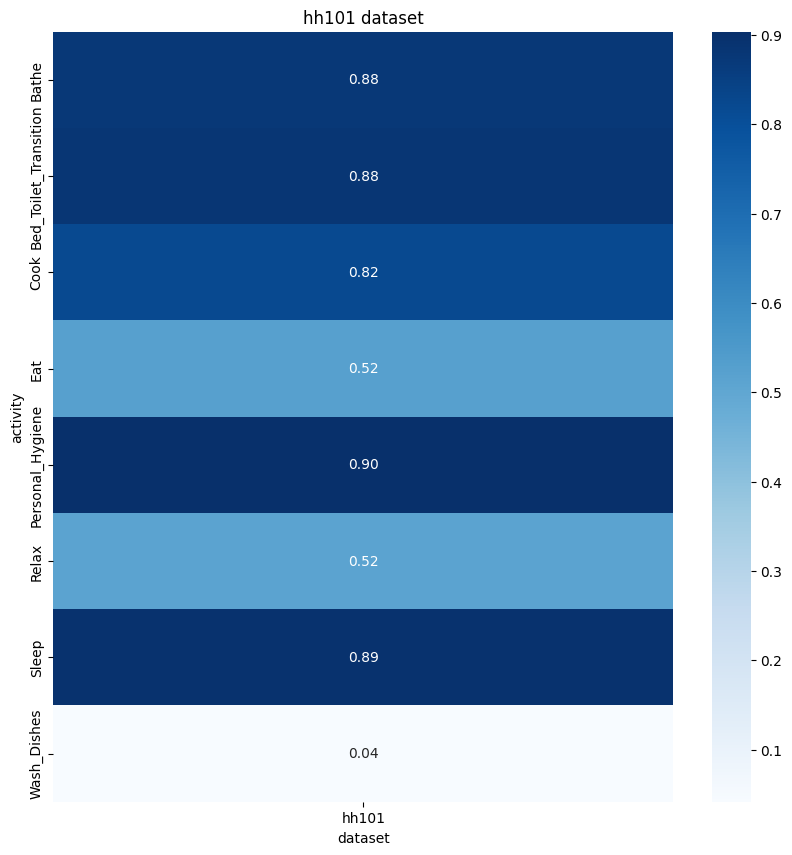

In [4]:
# draw heatmap for hh101 dataset
hh101_activities = al_activities[al_activities['dataset'] == 'hh101']
hh101_activities = hh101_activities.pivot(index='activity', columns='dataset', values='f1-score')
plt.figure(figsize=(10, 10))
sns.heatmap(hh101_activities, annot=True, fmt='.2f', cmap='Blues')
plt.title('hh101 dataset')
plt.show()

<AxesSubplot:xlabel='dataset', ylabel='f1-score'>

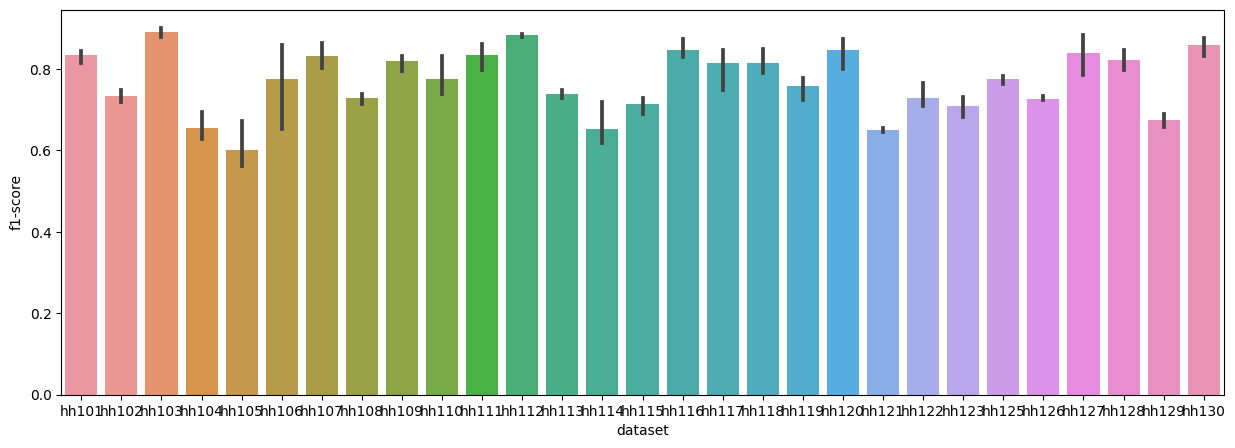

In [5]:
al_data = pd.DataFrame(dataset_f1).sort_values(by=['dataset', 'fold'])
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(data=al_data, x="dataset", y="f1-score")

../ftw_model/merged_result/BiLSTM-(fib_hh106)_1d_cnn_overlook_merged_with_time2vec_10_32/
../ftw_model/merged_result/BiLSTM-(fib_hh113)_1d_cnn_overlook_merged_with_time2vec_10_32/
../ftw_model/merged_result/BiLSTM-(fib_hh115)_1d_cnn_overlook_merged_with_time2vec_10_32/
../ftw_model/merged_result/BiLSTM-(fib_hh117)_1d_cnn_overlook_merged_with_time2vec_10_32/
../ftw_model/merged_result/BiLSTM-(fib_hh124)_1d_cnn_overlook_merged_with_time2vec_10_32/
../ftw_model/result_new1/BiLSTM-(fib_hh124_merged)_1d_cnn_overlook_merged_final_10_32/
../ftw_model/merged_result/BiLSTM-(fib_hh130)_1d_cnn_overlook_merged_with_time2vec_10_32/


<AxesSubplot:xlabel='dataset', ylabel='f1-score'>

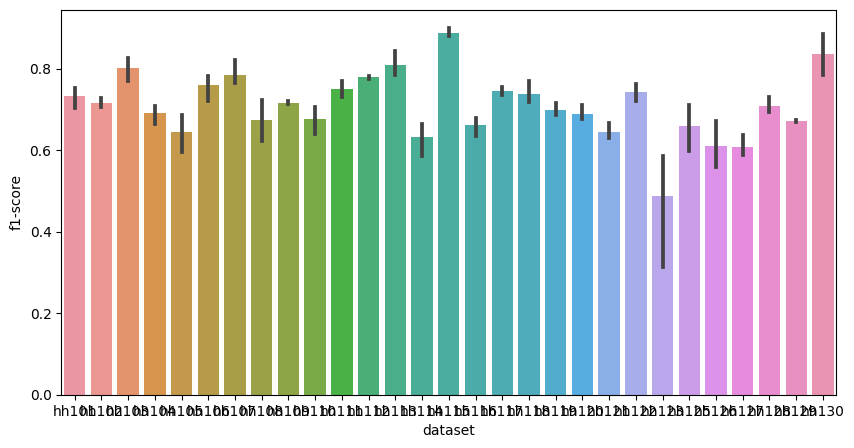

In [6]:
ftw_results_path = '../ftw_model/merged_result/'
ftw_results_dir = [os.path.join(ftw_results_path, f'BiLSTM-(fib_hh1{"0" + str(i) if i < 10 else str(i)})_1d_cnn_overlook_merged_with_time2vec_10_32/') for i in range(1, 31)]

# Put the name for hh dataset with 101, 103, 116, 119, 121, 122, 123, 126
good_dataset = ['hh101', 'hh103', 'hh116', 'hh119', 'hh121', 'hh122', 'hh123', 'hh126', 'hh109']
ftw_dataset_f1 = []
ftw_activities = []
for result_dir in ftw_results_dir:
    # find the result name in results_path using regex "hh1[0-9][0-9]"
    res = re.search("hh1[0-9][0-9]", result_dir)
    if res:
        dataset_name = res.group(0)
    else:
        dataset_name = 'unknown'

    if not os.path.isdir(result_dir):
        print(result_dir)
        result_dir = result_dir.replace('final', 'with_time2vec').replace('result_new1', 'merged_result')
        if not os.path.isdir(result_dir):
            result_dir = result_dir.replace(dataset_name, dataset_name + '_merged').replace('with_time2vec', 'final').replace('merged_result', 'result_new1')
            if not os.path.isdir(result_dir):
                print(result_dir)
                continue

    for i in range(4):
        results_path = result_dir + '/' + str(i)
        if not os.path.isdir(results_path):
            continue
        if (os.path.exists(results_path + '/report1.txt')):
            results_path = results_path + '/report1.txt'
        elif os.path.exists(results_path + '/report1.tsv'):
            results_path = results_path + '/report1.tsv'
        else:
            continue

        results = pd.read_csv(results_path, sep='\t', index_col=0)
        ftw_dataset_f1.append({'dataset': dataset_name, 'fold': i, 'f1-score': (results['micro/f1'][0]), 'precision': (results['micro/precision'][0]), 'recall': (results['micro/recall'][0])})

        # if dataset_name in good_dataset:
        #     ftw_dataset_f1.append({'dataset': dataset_name, 'fold': i, 'f1-score': (results['micro/f1'][0]), 'precision': (results['micro/precision'][0]), 'recall': (results['micro/recall'][0])})
        # else:
        #     ftw_dataset_f1.append({'dataset': dataset_name, 'fold': i, 'f1-score': (results['macro/f1'][0]), 'precision': (results['macro/precision'][0]), 'recall': (results['macro/recall'][0])})

        ############################################################
        results_path = result_dir + '/' + str(i)
        if (os.path.exists(results_path + '/report.txt')):
            activity_path = results_path + '/report.txt'
        elif os.path.exists(results_path + '/report.tsv'):
            activity_path = results_path + '/report.tsv'
        else:
            continue

        activities_result = pd.read_csv(activity_path, sep='\t', index_col=0)
        # itetrating over each row and appending the activities
        
        for index, row in activities_result.iterrows():
            if index in ['accuracy', 'macro avg', 'weighted avg']:
                continue
            ftw_activities.append({'dataset': dataset_name, 'fold': i, 'activity': row['activity'], 'f1-score': row["positive\"F1"]})

# take mean of f1-score for each dataset and activity from activities list
ftw_activities = pd.DataFrame(ftw_activities)
ftw_activities = ftw_activities.groupby(['dataset', 'activity']).mean().reset_index()

ftw_data = pd.DataFrame(ftw_dataset_f1).sort_values(by=['dataset', 'fold'])

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=ftw_data, x="dataset", y="f1-score")

<AxesSubplot:xlabel='dataset', ylabel='f1-score'>

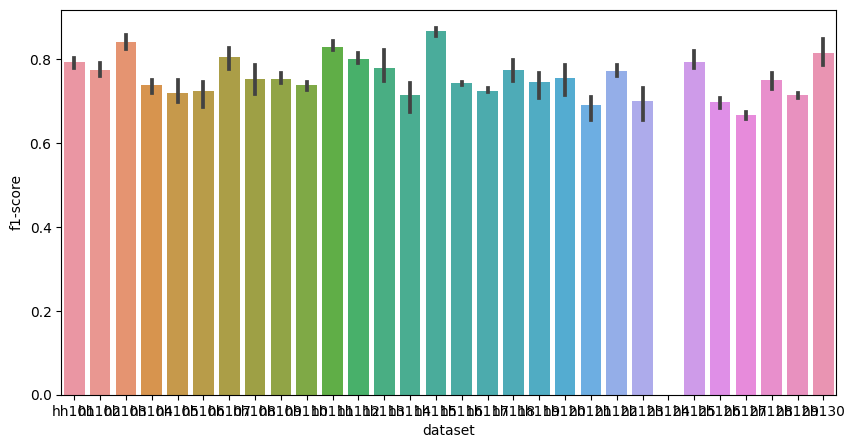

In [7]:
lstm_results_path = '../ftw_model/result_new1/'
lstm_results_dir = [os.path.join(lstm_results_path, f'BiLSTM-(fib_hh1{"0" + str(i) if i < 10 else str(i)})_mean_with_weight_overlook_merged_activities_10_32/') for i in range(1, 31)]

good_dataset = []
lstm_dataset_f1 = []
lstm_activities = []
for result_dir in lstm_results_dir:
    if not os.path.isdir(result_dir):
        print(result_dir)
        result_dir = result_dir.replace('final', 'with_time2vec').replace('result_new1', 'merged_result')
        if not os.path.isdir(result_dir):
            continue
    for i in range(4):
        results_path = result_dir + '/' + str(i)
        if not os.path.isdir(results_path):
            continue
        if (os.path.exists(results_path + '/report1.txt')):
            results_path = results_path + '/report1.txt'
        elif os.path.exists(results_path + '/report1.tsv'):
            results_path = results_path + '/report1.tsv'
        else:
            continue

        # find the result name in results_path using regex "hh1[0-9][0-9]"
        res = re.search("hh1[0-9][0-9]", result_dir)
        if res:
            dataset_name = res.group(0)
        else:
            dataset_name = 'unknown'

        results = pd.read_csv(results_path, sep='\t', index_col=0)
        lstm_dataset_f1.append({'dataset': dataset_name, 'fold': i, 'f1-score': (results['micro/f1'][0]), 'precision': (results['micro/precision'][0]), 'recall': (results['micro/recall'][0])})
        # lstm_dataset_f1.append({'dataset': dataset_name, 'fold': i, 'f1-score': (results['macro/f1'][0]), 'precision': (results['macro/precision'][0]), 'recall': (results['macro/recall'][0])})

        ############################################################
        results_path = result_dir + '/' + str(i)
        if (os.path.exists(results_path + '/report.txt')):
            activity_path = results_path + '/report.txt'
        elif os.path.exists(results_path + '/report.tsv'):
            activity_path = results_path + '/report.tsv'
        else:
            continue

        activities_result = pd.read_csv(activity_path, sep='\t', index_col=0)
        # itetrating over each row and appending the activities
        
        for index, row in activities_result.iterrows():
            if index in ['accuracy', 'macro avg', 'weighted avg']:
                continue
            lstm_activities.append({'dataset': dataset_name, 'fold': i, 'activity': row['activity'], 'f1-score': row["positive\"F1"]})

# take mean of f1-score for each dataset and activity from activities list
lstm_activities = pd.DataFrame(lstm_activities)
lstm_activities = lstm_activities.groupby(['dataset', 'activity']).mean().reset_index()

lstm_data = pd.DataFrame(lstm_dataset_f1).sort_values(by=['dataset', 'fold'])

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=lstm_data, x="dataset", y="f1-score")

precision      0.872340
recall         1.000000
f1-score       0.931818
support      369.000000
Name: Personal_Hygiene, dtype: float64
precision     0.837838
recall        0.953846
f1-score      0.892086
support      65.000000
Name: Leave_Home, dtype: float64
precision     0.948276
recall        0.808824
f1-score      0.873016
support      68.000000
Name: Enter_Home, dtype: float64
precision     0.647059
recall        0.392857
f1-score      0.488889
support      84.000000
Name: Relax, dtype: float64
precision     0.802817
recall        1.000000
f1-score      0.890625
support      57.000000
Name: Cook, dtype: float64
precision     0.478723
recall        0.737705
f1-score      0.580645
support      61.000000
Name: Eat, dtype: float64
precision     0.0
recall        0.0
f1-score      0.0
support      39.0
Name: Bathe, dtype: float64
precision     1.000000
recall        0.277778
f1-score      0.434783
support      18.000000
Name: Wash_Dishes, dtype: float64
precision     0.92
recall       

,dataset,fold,activity,f1-score
0,hh101,1,Personal_Hygiene,0.931818
1,hh101,1,Leave_Home,0.892086
2,hh101,1,Enter_Home,0.873016
3,hh101,1,Relax,0.488889
4,hh101,1,Cook,0.890625
...,...,...,...,...
833,hh130,3,Bathe,1.000000
834,hh130,3,Cook,0.571429
835,hh130,3,Eat,0.000000
836,hh130,3,Relax,0.125000


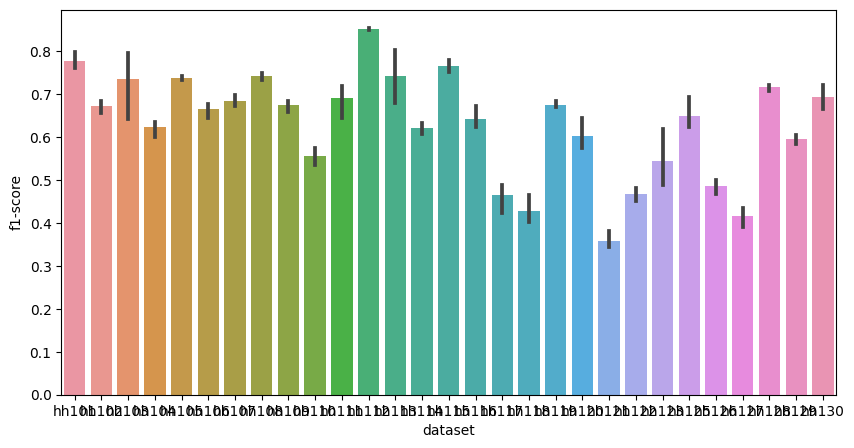

In [8]:
deep_casas_path = '../tmp/checkpoint1/'
deep_casas_link = [os.path.join(deep_casas_path, f'biLSTM-hh1{str(i) if i > 9 else "0" + str(i)}_merged') for i in range(1, 31)]

deep_casas_good_dataset = ['hh112', 'hh125', 'hh128', 'hh130']
deep_casas_dataset_f1 = []
deep_casas_activities = []
for result_dir in deep_casas_link:
    dataset_name = result_dir.split('/')[-1].split('-')[1].replace('_merged', '')
    if not os.path.isdir(result_dir):
        continue
    for i in range(1, 4):
        results_path = result_dir + '/fold' + str(i)
        if not os.path.isdir(results_path):
            continue
        if (os.path.exists(results_path + '/classification_report.csv')):
            results_path = results_path + '/classification_report.csv'
        else:
            continue

        results = pd.read_csv(results_path, index_col=0, header=0)
        # deep_casas_dataset_f1.append({'dataset': dataset_name, 'fold': i, 'f1-score': (results['f1-score']['macro avg']), 'precision': (results['precision']['macro avg']), 'recall': (results['recall']['macro avg'])})
        deep_casas_dataset_f1.append({'dataset': dataset_name, 'fold': i, 'f1-score': (results['f1-score']['weighted avg']), 'precision': (results['precision']['weighted avg']), 'recall': (results['recall']['weighted avg'])})
        
        
        for index, row in results.iterrows():
            if index in ['accuracy', 'macro avg', 'weighted avg']:
                continue
            print(row)
            deep_casas_activities.append({'dataset': dataset_name, 'fold': i, 'activity':index, 'f1-score': row['f1-score']})

deep_casas_data = pd.DataFrame(deep_casas_dataset_f1).sort_values(by=['dataset', 'fold'])
deep_casas_activities = pd.DataFrame(deep_casas_activities)

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=deep_casas_data, x="dataset", y="f1-score")
deep_casas_activities

precision      0.8484
recall         0.9409
f1-score       0.8922
support      220.0000
Name: Personal_Hygiene, dtype: float64
precision      0.8462
recall         0.8701
f1-score       0.8579
support      177.0000
Name: Relax, dtype: float64
precision     0.9211
recall        0.8333
f1-score      0.8750
support      42.0000
Name: Cook, dtype: float64
precision     0.7885
recall        0.5775
f1-score      0.6667
support      71.0000
Name: Eat, dtype: float64
precision     0.7895
recall        0.3659
f1-score      0.5000
support      41.0000
Name: Bathe, dtype: float64
precision    0.7778
recall       0.8750
f1-score     0.8235
support      8.0000
Name: Wash_Dishes, dtype: float64
precision      0.6699
recall         0.5267
f1-score       0.5897
support      393.0000
Name: Sleep, dtype: float64
precision    1.0000
recall       0.2857
f1-score     0.4444
support      7.0000
Name: Bed_Toilet_Transition, dtype: float64
precision    1.0
recall       1.0
f1-score     1.0
support      1.0
Na

,dataset,fold,activity,f1-score,support
0,hh101,1,Personal_Hygiene,0.8922,220.0
1,hh101,1,Relax,0.8579,177.0
2,hh101,1,Cook,0.8750,42.0
3,hh101,1,Eat,0.6667,71.0
4,hh101,1,Bathe,0.5000,41.0
...,...,...,...,...,...
955,hh130,3,Work,0.7919,78.0
956,hh130,3,Relax,0.1212,14.0
957,hh130,3,Wash_Dishes,1.0000,1.0
958,hh130,3,micro avg,0.7553,602.0


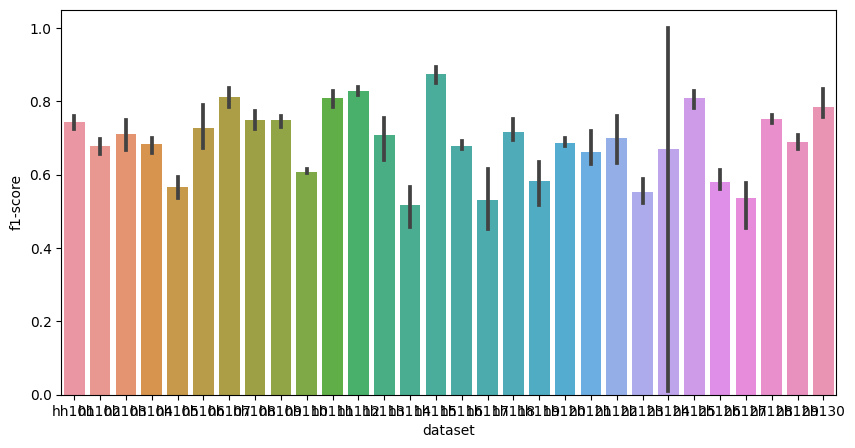

In [9]:
joint_learning_path = '../ftw_model/result_new1'
joint_learning_link = [os.path.join(joint_learning_path, f'BiLSTM-(fib_hh1{"0" + str(i) if i < 10 else str(i)})_joint_overlook_merged_10_10') for i in range(1, 31)]

joint_learning_dataset_f1 = []
joint_learning_activities = []
for result_dir in joint_learning_link:
    # find the result name in results_path using regex "hh1[0-9][0-9]"
    if not os.path.isdir(result_dir):
        print(result_dir)
    for i in range(1, 4):
        results_path = result_dir + '/' + str(i)
        if not os.path.isdir(results_path):
            print(results_path)
            continue
        if (os.path.exists(results_path + '/report.txt')):
            results_path = results_path + '/report.txt'
        else:
            continue
        res = re.search("hh1[0-9][0-9]", results_path)
        if res:
            dataset_name = res.group(0)
        else:
            dataset_name = 'unknown'
            
        results = pd.read_csv(results_path, index_col=0, header=0, sep='\t')
        # joint_learning_dataset_f1.append({'dataset': dataset_name, 'fold': i, 'f1-score': (results['f1-score']['macro avg']), 'precision': (results['precision']['macro avg']), 'recall': (results['recall']['macro avg'])})
        joint_learning_dataset_f1.append({'dataset': dataset_name, 'fold': i, 'f1-score': (results['f1-score']['weighted avg']), 'precision': (results['precision']['weighted avg']), 'recall': (results['recall']['weighted avg'])})
        
        
        for index, row in results.iterrows():
            if index in ['accuracy', 'macro avg', 'weighted avg']:
                continue
            print(row)
            joint_learning_activities.append({'dataset': dataset_name, 'fold': i, 'activity':index, 'f1-score': row['f1-score'], 'support': row['support']})

joint_learning_data = pd.DataFrame(joint_learning_dataset_f1).sort_values(by=['dataset', 'fold'])
joint_learning_activities = pd.DataFrame(joint_learning_activities)

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=joint_learning_data, x="dataset", y="f1-score")
joint_learning_activities

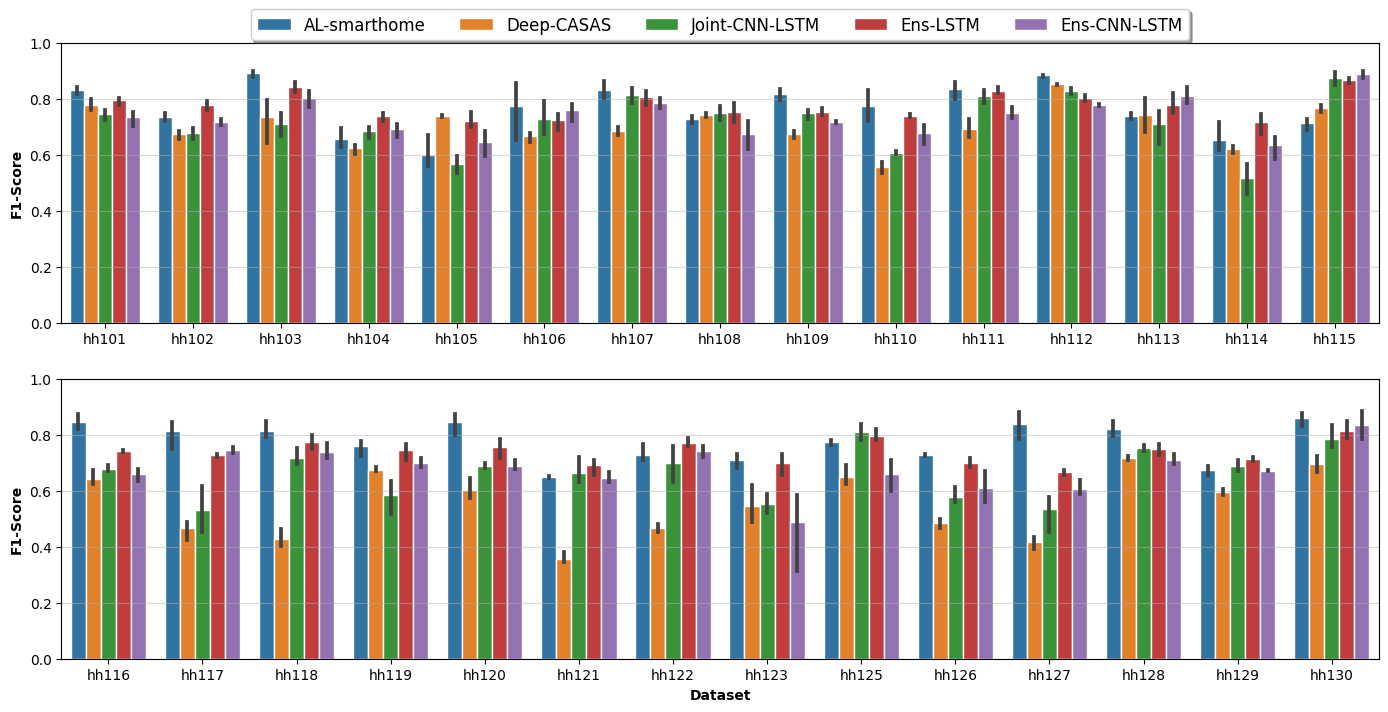

In [10]:
# merge the two dataframes with hue
al_data['model'] = 'AL-smarthome'
lstm_data['model'] = 'Ens-LSTM'
ftw_data['model'] = 'Ens-CNN-LSTM'
deep_casas_data['model'] = 'Deep-CASAS'
joint_learning_data['model'] = 'Joint-CNN-LSTM'

# merged_data = pd.concat([al_data, joint_learning_data, lstm_data, ftw_data], ignore_index=True)
merged_data = pd.concat([al_data, deep_casas_data, joint_learning_data, lstm_data, ftw_data], ignore_index=True)

# filter dataset hh106, hh113, hh115, hh117, hh130
# merged_data = merged_data[~merged_data['dataset'].isin(['hh106', 'hh113', 'hh115', 'hh117', 'hh130'])]

# filter the hh124 dataset
merged_data = merged_data[merged_data['dataset'] != 'hh124']

# plot the comparison of the two models near each other
# split the barplot into two parts and plot them separately (1-15 and 16-30)
# create subplots with 2 rows and 1 column
fig, ax = plt.subplots(2, 1, figsize=(17, 8))
colors = sns.color_palette('tab10', n_colors=5)

sns.barplot(data=merged_data[merged_data['dataset'] < 'hh116'], x="dataset", y="f1-score", hue="model", width=0.8, edgecolor="w", ax=ax[0], palette=colors)
sns.barplot(data=merged_data[merged_data['dataset'] >= 'hh116'], x="dataset", y="f1-score", hue="model", width=0.8, edgecolor="w", ax=ax[1], palette=colors)

# sns.barplot(data=merged_data, x="dataset", y="f1-score", hue="model", width=0.8, edgecolor="w")


# box = ax.get_position()
# ax.set_position([box.x0, box.y0 + box.height * 0.1,
#                  box.width, box.height * 0.9])

# # Put a legend below current axis
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
#           fancybox=True, shadow=True, ncol=5)
ax[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=5, fancybox=True, shadow=True, fontsize=12)
# disable legend for the second plot
ax[1].legend_.remove()

# fix the ylim for the two plots
ax[0].set_ylim(0.0, 1.0)
ax[1].set_ylim(0.0, 1.0)
# # make the legend larger font

# disable the xlabel for the first plot
ax[0].set_xlabel('')

# # put legend outside the plot on top right above the plot
# # plt.legend(loc='upper left', bbox_to_anchor=(1, 1.02))

# # rotate the xticks
# plt.xticks(rotation=45, ha='right', rotation_mode='anchor')

# # bold the xlabel and ylabel
plt.xlabel('Dataset', fontweight='bold')
plt.ylabel('F1-Score', fontweight='bold')
ax[0].set_ylabel('F1-Score', fontweight='bold')
ax[0].grid(True, axis='y', alpha=0.5)

# # grid
plt.grid(True, axis='y', alpha=0.5)
ax[1].grid(True, axis='y', alpha=0.5)

# # save the plot
plt.savefig('evaluation/simple_har.png', dpi=300, bbox_inches='tight')

In [11]:
avg_fold_merged_data = merged_data.groupby(['dataset', 'model']).mean().reset_index()


# sort the data by the f1-score and remove duplicate for each dataset
avg_fold_merged_data = avg_fold_merged_data.sort_values(by=['dataset', 'f1-score'], ascending=False).drop_duplicates(subset=['dataset'], keep='first')

# count the model
model_count = avg_fold_merged_data['model'].value_counts()
model_count

AL-smarthome      18
Ens-LSTM           7
Ens-CNN-LSTM       2
Joint-CNN-LSTM     1
Deep-CASAS         1
Name: model, dtype: int64

In [12]:
# sort by f1-score
sorted_merged_data = merged_data.sort_values(by=['f1-score'], ascending=False)
# drop duplicate model
sorted_merged_data = sorted_merged_data.drop_duplicates(subset=['model'], keep='first')
max_merged_data = sorted_merged_data.round(4)[['model', 'f1-score', 'dataset']]

# concat the f1-score and the dataset
max_merged_data['f1-score'] = max_merged_data['f1-score'].astype(str) + ' (' + max_merged_data['dataset'] + ')'
max_merged_data = max_merged_data[['model', 'f1-score']].set_index('model')
max_merged_data

,f1-score
model,
AL-smarthome,0.9 (hh103)
Ens-CNN-LSTM,0.8995 (hh115)
Joint-CNN-LSTM,0.8948 (hh115)
Ens-LSTM,0.8748 (hh115)
Deep-CASAS,0.8542 (hh112)


In [13]:
# sort by f1-score
sorted_merged_data = merged_data.sort_values(by=['f1-score'], ascending=False)
# drop duplicate model
sorted_merged_data = sorted_merged_data.drop_duplicates(subset=['model'], keep='last')
min_merged_data = sorted_merged_data.round(4)[['model', 'f1-score', 'dataset']]

# concat the f1-score and the dataset
min_merged_data['f1-score'] = min_merged_data['f1-score'].astype(str) + ' (' + min_merged_data['dataset'] + ')'
min_merged_data = min_merged_data[['model', 'f1-score']].set_index('model')
min_merged_data

,f1-score
model,
Ens-LSTM,0.6554 (hh123)
AL-smarthome,0.5615 (hh105)
Joint-CNN-LSTM,0.4531 (hh117)
Deep-CASAS,0.3448 (hh121)
Ens-CNN-LSTM,0.3137 (hh123)


In [14]:
# get the average f1-score, precision and recall for each model and their confidence interval
merged_data_out = merged_data.groupby(['model']).agg({'f1-score': ['mean', 'std'], 'precision': ['mean', 'std'], 'recall': ['mean', 'std']})
merged_data_out.columns = ['f1-score', 'f1-score-std', 'precision', 'precision-std', 'recall', 'recall-std']

# calculate the confidence interval
merged_data_out['f1-score-std'] = merged_data_out['f1-score-std'] / np.sqrt(merged_data['dataset'].nunique()) * 1.96
merged_data_out['precision-std'] = merged_data_out['precision-std'] / np.sqrt(merged_data['dataset'].nunique()) * 1.96
merged_data_out['recall-std'] = merged_data_out['recall-std'] / np.sqrt(merged_data['dataset'].nunique()) * 1.96

# output the score with add minus std
merged_data_out['f1-score'] = merged_data_out['f1-score'].round(4).astype(str) + ' $\\pm$ ' + merged_data_out['f1-score-std'].round(3).astype(str)
merged_data_out['precision'] = merged_data_out['precision'].round(4).astype(str) + ' $\\pm$ ' + merged_data_out['precision-std'].round(3).astype(str)
merged_data_out['recall'] = merged_data_out['recall'].round(4).astype(str) + ' $\\pm$' + merged_data_out['recall-std'].round(3).astype(str)

# drop std columns
merged_data_out = merged_data_out.drop(columns=['f1-score-std', 'precision-std', 'recall-std'])

# sort the models
merged_data_out = merged_data_out.reindex(['AL-smarthome', 'Deep-CASAS', 'Joint-CNN-LSTM', 'Ens-LSTM', 'Ens-CNN-LSTM'])

# add \textbf{} to the highest f1-score among all models


# concat the min and max f1-score as new columns
merged_data_out['Max-F1'] = max_merged_data['f1-score']
merged_data_out['Min-F1'] = min_merged_data['f1-score']

# rename the column as captial first letter
merged_data_out = merged_data_out.rename(columns={'f1-score': 'F1-Score', 'precision': 'Precision', 'recall': 'Recall'})

# add the \textbf{} to the highest f1-score among all models
merged_data_out['F1-Score'] = merged_data_out['F1-Score'].apply(lambda x: '\\textbf{' + x + '}' if x == merged_data_out['F1-Score'].max() else x)
merged_data_out['Precision'] = merged_data_out['Precision'].apply(lambda x: '\\textbf{' + x + '}' if x == merged_data_out['Precision'].max() else x)
merged_data_out['Recall'] = merged_data_out['Recall'].apply(lambda x: '\\textbf{' + x + '}' if x == merged_data_out['Recall'].max() else x)
# drop fold column
# merged_data_out = merged_data_out.drop(columns=['fold'])
# bold the column name
merged_data_out.columns = ['\\textbf{' + col + '}' for col in merged_data_out.columns]
print(merged_data_out.to_latex(escape=False))
# merged_data_out

\begin{tabular}{llllll}
\toprule
{} &           \textbf{F1-Score} &           \textbf{Precision} &            \textbf{Recall} & \textbf{Max-F1} & \textbf{Min-F1} \\
model          &                             &                              &                            &                 &                 \\
\midrule
AL-smarthome   &  \textbf{0.7696 $\pm$ 0.03} &             0.78 $\pm$ 0.027 &  \textbf{0.775 $\pm$0.029} &     0.9 (hh103) &  0.5615 (hh105) \\
Deep-CASAS     &          0.6305 $\pm$ 0.045 &            0.6461 $\pm$ 0.04 &          0.6702 $\pm$0.044 &  0.8542 (hh112) &  0.3448 (hh121) \\
Joint-CNN-LSTM &          0.6906 $\pm$ 0.037 &  \textbf{0.7844 $\pm$ 0.027} &          0.6502 $\pm$0.045 &  0.8948 (hh115) &  0.4531 (hh117) \\
Ens-LSTM       &          0.7583 $\pm$ 0.019 &            0.7597 $\pm$ 0.02 &            0.76 $\pm$0.024 &  0.8748 (hh115) &  0.6554 (hh123) \\
Ens-CNN-LSTM   &          0.7088 $\pm$ 0.031 &           0.7135 $\pm$ 0.036 &          0.7106 $\pm$0.031 &

In [16]:
# get the support for each activity for each dataset from joint learning activities
act_support = joint_learning_activities[['activity', 'support', 'dataset']]
# take mean of the support
act_support = act_support.groupby(['activity', 'dataset']).mean().reset_index()
# rename the support column
act_support = act_support.rename(columns={'support': 'act-support'})

# drop samples avg, micro avg and macro avg in the activity support
act_support = act_support[~act_support['activity'].isin(['samples avg', 'micro avg', 'macro avg'])]

act_support

,activity,dataset,act-support
0,Bathe,hh101,48.666667
1,Bathe,hh102,84.000000
2,Bathe,hh103,21.666667
3,Bathe,hh104,40.000000
4,Bathe,hh105,22.666667
...,...,...,...
255,Work,hh125,14.000000
256,Work,hh126,192.000000
257,Work,hh128,267.666667
258,Work,hh129,14.666667


Index(['Bathe', 'Bed_Toilet_Transition', 'Cook', 'Eat', 'Wash_Dishes', 'Work',
       'Personal_Hygiene', 'Relax', 'Sleep'],
      dtype='object', name='activity')


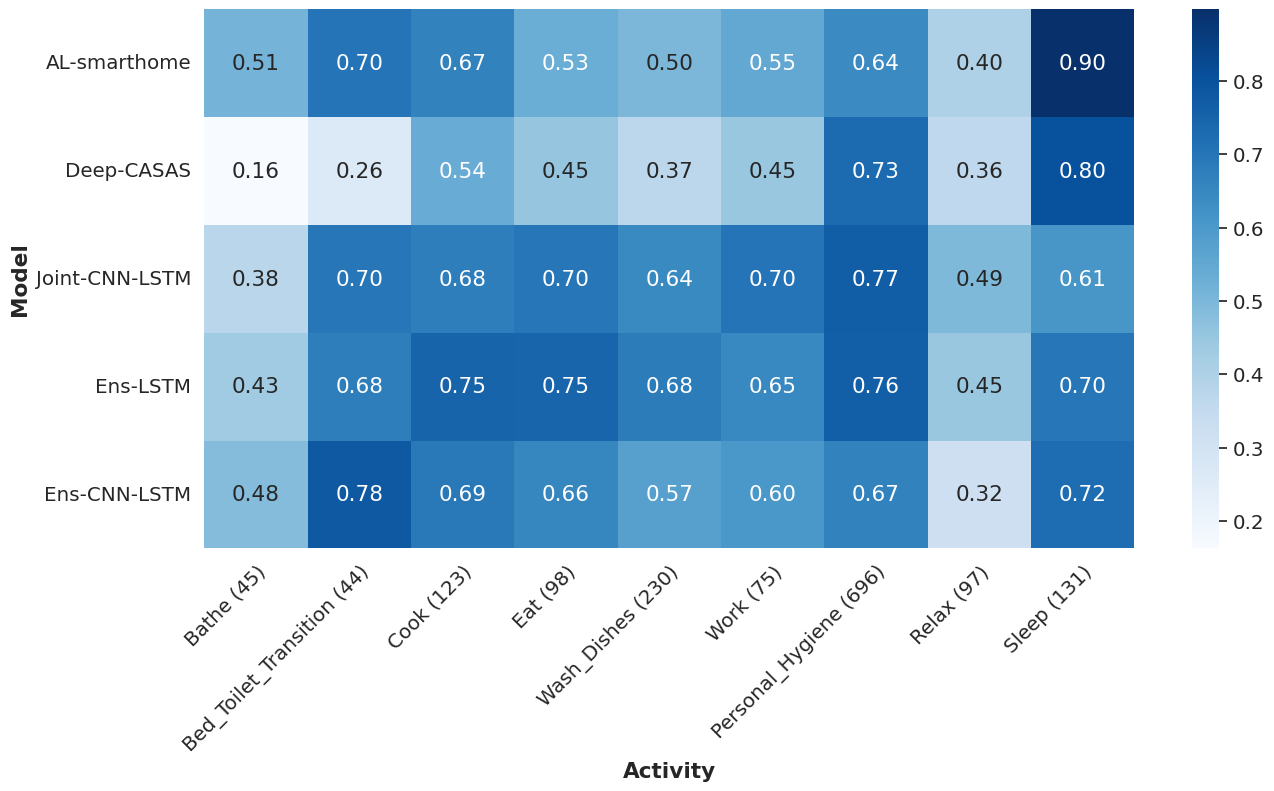

In [17]:
# combine the two activities dataframes
al_activities['model'] = 'AL-smarthome'
lstm_activities['model'] = 'Ens-LSTM'
ftw_activities['model'] = 'Ens-CNN-LSTM'
deep_casas_activities['model'] = 'Deep-CASAS'
joint_learning_activities['model'] = 'Joint-CNN-LSTM'

# get the support for each activity for each dataset from joint learning activities
act_support = joint_learning_activities[['activity', 'support', 'dataset']]
# take mean of the support
act_support = act_support.groupby(['activity', 'dataset']).mean().reset_index()
# rename the support column
act_support = act_support.rename(columns={'support': 'act-support'})
act_support['act-support'] = act_support['act-support'].round(0).astype(int)


# merged_activities = pd.concat([al_activities, joint_learning_activities, lstm_activities, ftw_activities], ignore_index=True)
merged_activities = pd.concat([al_activities, deep_casas_activities, joint_learning_activities, lstm_activities, ftw_activities], ignore_index=True)

# dataset_activities = merged_activities.drop_duplicates(subset=['activity', 'model'])

# dataset_activities = dataset_activities.pivot(index='activity', columns='model', values='f1-score')
# dataset_activities
# aggregate between activitiy for each model
# drop activity equals micro avg
merged_activities = merged_activities[merged_activities['activity'] != 'micro avg']
dataset_activities = merged_activities.groupby(['activity', 'model']).mean().reset_index()
dataset_activities = dataset_activities.pivot(index='activity', columns='model', values='f1-score')
# fill the nan values with 0
dataset_activities = dataset_activities.fillna(0)
# dataset_activities['delta'] = dataset_activities['Ens-CNN-LSTM'] - dataset_activities['AL-smarthome']
# dataset_activities = dataset_activities.sort_values(by='delta', ascending=False)

# sort by predefined order, the order is ['Bathe', 'Bed_Toilet_Transition', 'Cook', 'Eat', 'Wash_Dishes', 'Work', 'Personal_Hygiene','Relax', 'Sleep']
dataset_activities = dataset_activities.reindex(['Bathe', 'Bed_Toilet_Transition', 'Cook', 'Eat', 'Wash_Dishes', 'Work', 'Personal_Hygiene','Relax', 'Sleep'])

dataset_activities = dataset_activities[['AL-smarthome', 'Deep-CASAS','Joint-CNN-LSTM', 'Ens-LSTM', 'Ens-CNN-LSTM']]
# print the activities
print(dataset_activities.index)

# add the mean support number for each activity to the index, by taking mean between datasets
act_support = act_support.groupby(['activity']).mean().reset_index()
# dropping micro avg, macro avg and samples avg
act_support = act_support[~act_support['activity'].isin(['micro avg', 'macro avg', 'samples avg'])]
# round the support as integer
act_support['act-support'] = act_support['act-support'].round(0).astype(int)
dataset_activities.index = dataset_activities.index + ' (' + act_support['act-support'].astype(str) + ')'

# plot the heatmap in transposed form

# increase the font size
sns.set(font_scale=1.3)

plt.figure(figsize=(15, 7))

sns.heatmap(dataset_activities.T, annot=True, fmt='.2f', cmap='Blues')
# retote yticks
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.yticks(rotation=0)

# ytitle "Activity" with bold font
plt.ylabel('Model', fontweight='bold')
plt.xlabel('Activity', fontweight='bold')

# print the current x and y ticks
# plt.title('Average fold F1-score per activity for ' + dataset)
plt.show()
# print the current x and y ticks

In [18]:
# get the support for each activity for each dataset from joint learning activities
act_support = joint_learning_activities[['activity', 'support', 'dataset']]
# take mean of the support
act_support = act_support.groupby(['activity', 'dataset']).mean().reset_index()
# rename the support column
act_support = act_support.rename(columns={'support': 'act-support'})

# round the support as integer
act_support['act-support'] = act_support['act-support'].round(0).astype(int)

# drop samples avg, micro avg and macro avg in the activity support
act_support = act_support[~act_support['activity'].isin(['samples avg', 'micro avg', 'macro avg'])]

act_support

,activity,dataset,act-support
0,Bathe,hh101,49
1,Bathe,hh102,84
2,Bathe,hh103,22
3,Bathe,hh104,40
4,Bathe,hh105,23
...,...,...,...
255,Work,hh125,14
256,Work,hh126,192
257,Work,hh128,268
258,Work,hh129,15


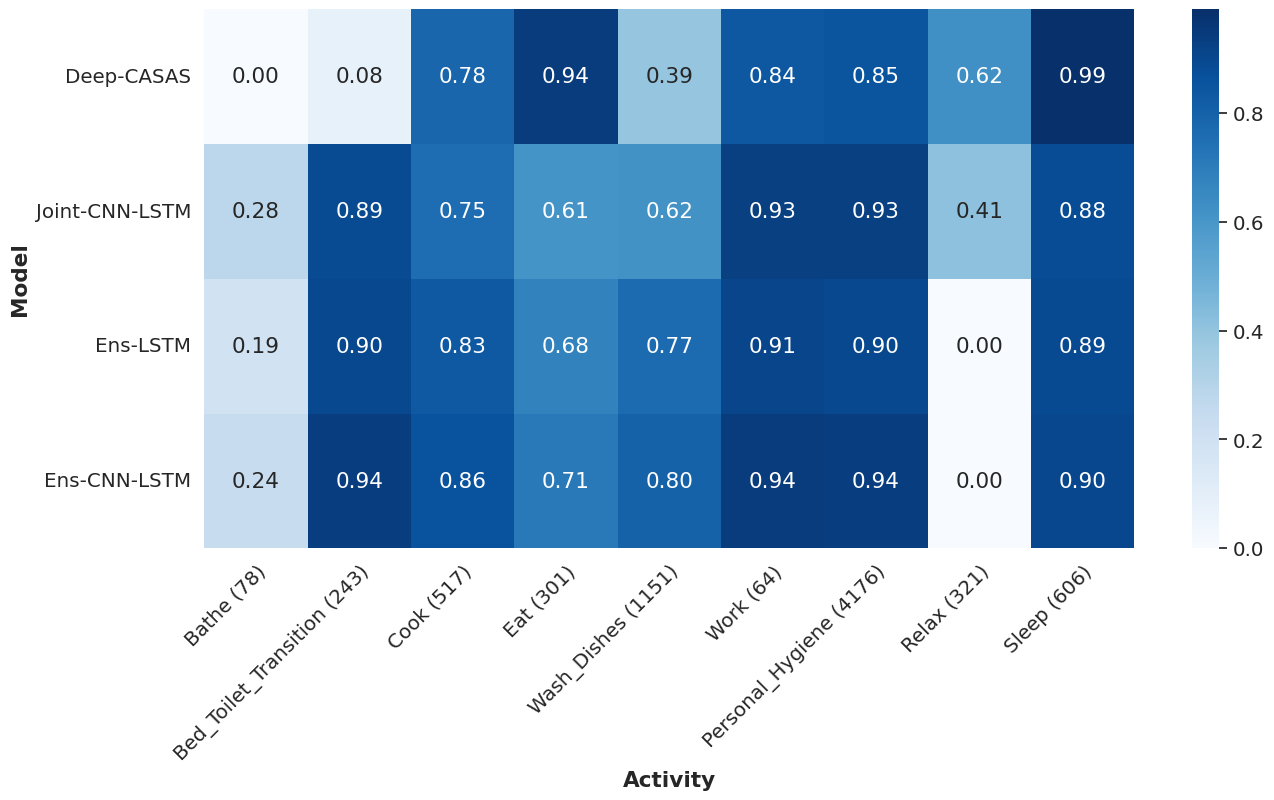

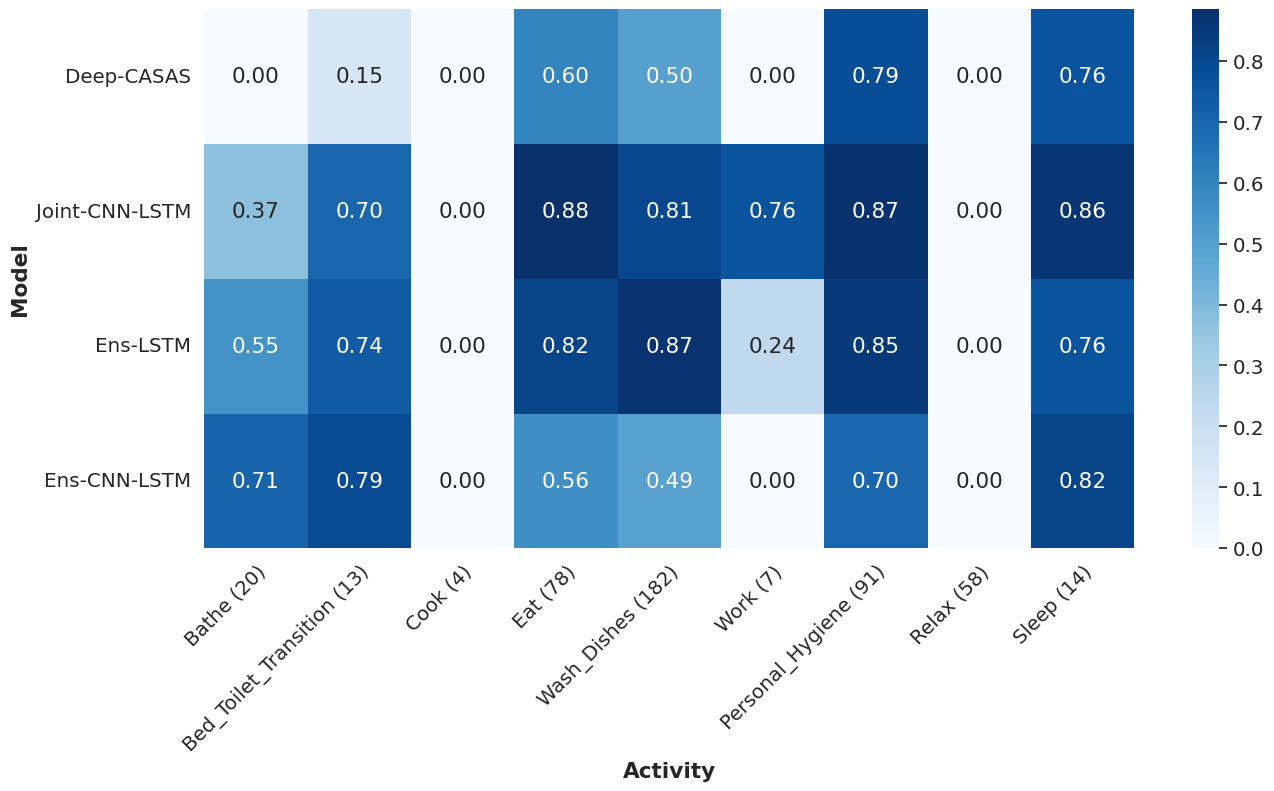

In [20]:

# plot heatmap for each dataset
for dataset in merged_activities['dataset'].unique():
    if dataset not in ['hh115', 'hh125']:
        continue

# get the delta of the two models
    dataset_activities = merged_activities[merged_activities['dataset'] == dataset]
# print(dataset_activities)
# remove duplicates
    dataset_activities = dataset_activities.drop_duplicates(subset=['activity', 'model'])

    dataset_activities = dataset_activities.pivot(index='activity', columns='model', values='f1-score')
    # fill the nan values with 0
    dataset_activities = dataset_activities.fillna(0)
    dataset_activities = dataset_activities.reindex(['Bathe', 'Bed_Toilet_Transition', 'Cook', 'Eat', 'Wash_Dishes', 'Work', 'Personal_Hygiene','Relax', 'Sleep'])


    # add a plus sign to the delta
    # dataset_activities['delta'] = dataset_activities['delta'].apply(lambda x: '+' + str(x))

    # put human picked features on the left
    dataset_activities = dataset_activities[['Deep-CASAS','Joint-CNN-LSTM', 'Ens-LSTM', 'Ens-CNN-LSTM']]

    # add the support to the activity labels for hh103

    dataset_activities.index = dataset_activities.index + ' (' + act_support[act_support['dataset'] == dataset]['act-support'].astype(str) + ')'
    # plot the heatmap in transposed form

    # increase the font size
    sns.set(font_scale=1.3)

    plt.figure(figsize=(15, 7))

    sns.heatmap(dataset_activities.T, annot=True, fmt='.2f', cmap='Blues')
    # retote yticks
    plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
    plt.yticks(rotation=0)

    # ytitle "Activity" with bold font
    plt.ylabel('Model', fontweight='bold')
    plt.xlabel('Activity', fontweight='bold')

    # plt.title('Average fold F1-score per activity for ' + dataset)
    plt.show()

In [21]:
merged_data
# group by dataset and model and get the mean of the f1-score
merged_data_latex = merged_data.groupby(['dataset', 'model']).mean().drop(columns=['fold'])

# arranage the order of the models
merged_data_latex = merged_data_latex.reindex(['AL-smarthome', 'Deep-CASAS', 'Joint-CNN-LSTM', 'Ens-LSTM', 'Ens-CNN-LSTM'], level=1)

# round the f1-score to 4 decimal places
merged_data_latex = merged_data_latex.round(6)

# rename the columns to capitalize the first letter for f1-score to F1-score, precision to Precision and recall to Recall
merged_data_latex = merged_data_latex.rename(columns={'f1-score': 'F1-score', 'precision': 'Precision', 'recall': 'Recall'})

# bold the column names by adding \textbf{column_name}
merged_data_latex.columns = ['\textbf{' + col + '}' for col in merged_data_latex.columns]

# make the dataset and model as columns but still grouped by dataset

# split the table into 5 parts
for i in range(0, 5):
    # get the current part
    current_part = merged_data_latex.iloc[i*30:(i+1)*30]
    # print the latex table
    print(current_part.to_latex(multirow=True, escape=False))
    # print a new line
    
# to latex with multiindex
# print(merged_data_latex.to_latex(multirow=True))

\begin{tabular}{llrrr}
\toprule
      &              &  \textbf{F1-score} &  \textbf{Precision} &  \textbf{Recall} \\
dataset & model &                    &                     &                  \\
\midrule
\multirow{5}{*}{hh101} & AL-smarthome &           0.832745 &            0.832525 &         0.841200 \\
      & Deep-CASAS &           0.777702 &            0.752123 &         0.821889 \\
      & Joint-CNN-LSTM &           0.743833 &            0.826400 &         0.693567 \\
      & Ens-LSTM &           0.794135 &            0.815004 &         0.774588 \\
      & Ens-CNN-LSTM &           0.733711 &            0.771025 &         0.700319 \\
\cline{1-5}
\multirow{5}{*}{hh102} & AL-smarthome &           0.733229 &            0.743797 &         0.732447 \\
      & Deep-CASAS &           0.673763 &            0.687405 &         0.737781 \\
      & Joint-CNN-LSTM &           0.677967 &            0.704900 &         0.662533 \\
      & Ens-LSTM &           0.775959 &            0.766059 & 

### Load unmerged activities

In [36]:
is_macro = True

In [37]:
dataset_f1 = []
al_activities = []
for dataset in results_dataset:
    for i in range(3):
        results_path = al_results_path + dataset + '/filtered_report_nonoverlap' + str(i) + '.tsv'
        if not os.path.exists(results_path):
            continue
        results = pd.read_csv(results_path, sep='\t', index_col=0)
        if is_macro:
            dataset_f1.append({'dataset': dataset, 'fold': i, 'f1-score': (results['f1-score']['macro avg']), 'precision': (results['precision']['macro avg']), 'recall': (results['recall']['macro avg'])})
        else:
            dataset_f1.append({'dataset': dataset, 'fold': i, 'f1-score': (results['f1-score']['weighted avg']), 'precision': (results['precision']['weighted avg']), 'recall': (results['recall']['weighted avg'])})

        # itetrating over each row and appending the activities
        for index, row in results.iterrows():
            if index in ['accuracy', 'macro avg', 'weighted avg']:
                continue
            al_activities.append({'dataset': dataset, 'fold': i, 'activity': index, 'f1-score': row['f1-score']})

# take mean of f1-score for each dataset and activity from activities list
al_activities = pd.DataFrame(al_activities)
al_activities = al_activities.groupby(['dataset', 'activity']).mean().reset_index()
al_activities

,dataset,activity,fold,f1-score
0,hh101,Bathe,1.0,0.869643
1,hh101,Bed_Toilet_Transition,1.0,0.636137
2,hh101,Cook,1.0,0.311910
3,hh101,Cook_Breakfast,1.0,0.814789
4,hh101,Cook_Dinner,1.0,0.664059
...,...,...,...,...
904,hh130,Toilet,1.0,0.533545
905,hh130,Wash_Dishes,1.0,0.000000
906,hh130,Watch_TV,1.0,0.797951
907,hh130,Work,1.0,0.000000


In [38]:
# calculate each dataset number of activities
dataset_activities = al_activities.groupby(['dataset']).count().reset_index()
dataset_activities = dataset_activities[['dataset', 'activity']]
dataset_activities = dataset_activities.rename(columns={'activity': 'activities'})
dataset_activities
# calcute the mean of the activities
dataset_activities['activities'].mean()

30.3

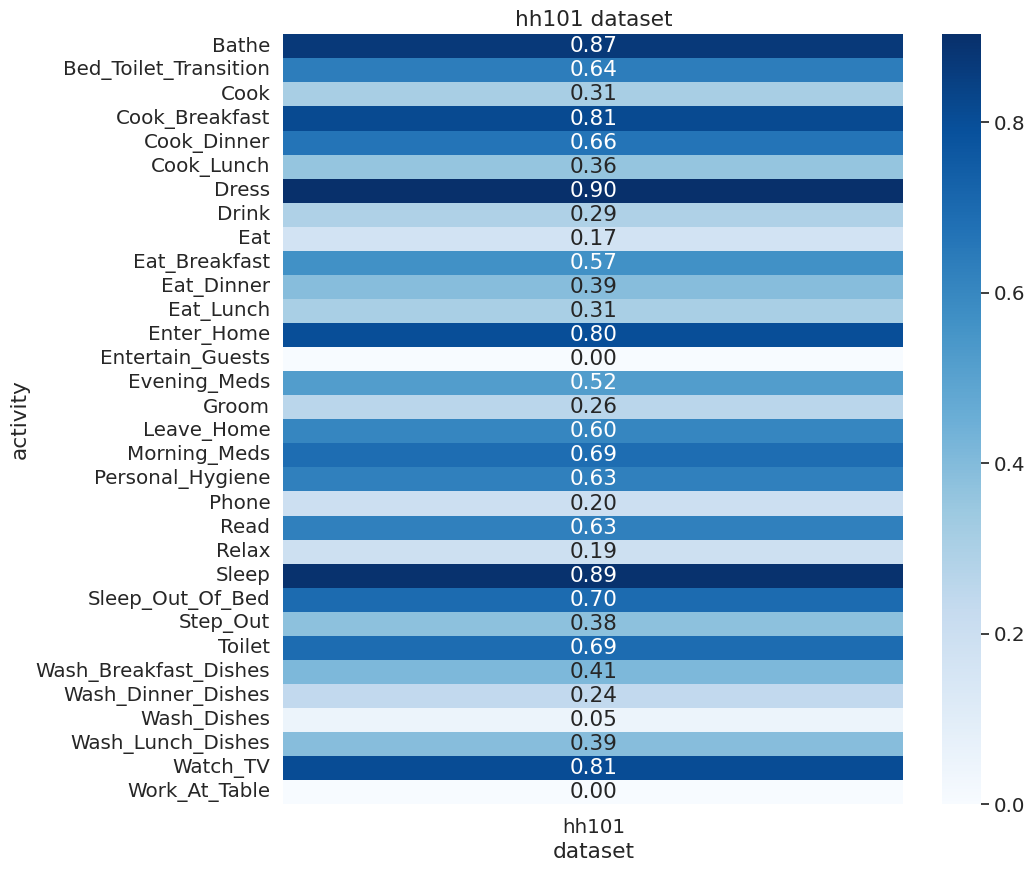

In [39]:
# draw heatmap for hh101 dataset
hh101_activities = al_activities[al_activities['dataset'] == 'hh101']
hh101_activities = hh101_activities.pivot(index='activity', columns='dataset', values='f1-score')
plt.figure(figsize=(10, 10))
sns.heatmap(hh101_activities, annot=True, fmt='.2f', cmap='Blues')
plt.title('hh101 dataset')
plt.show()

<AxesSubplot:xlabel='dataset', ylabel='f1-score'>

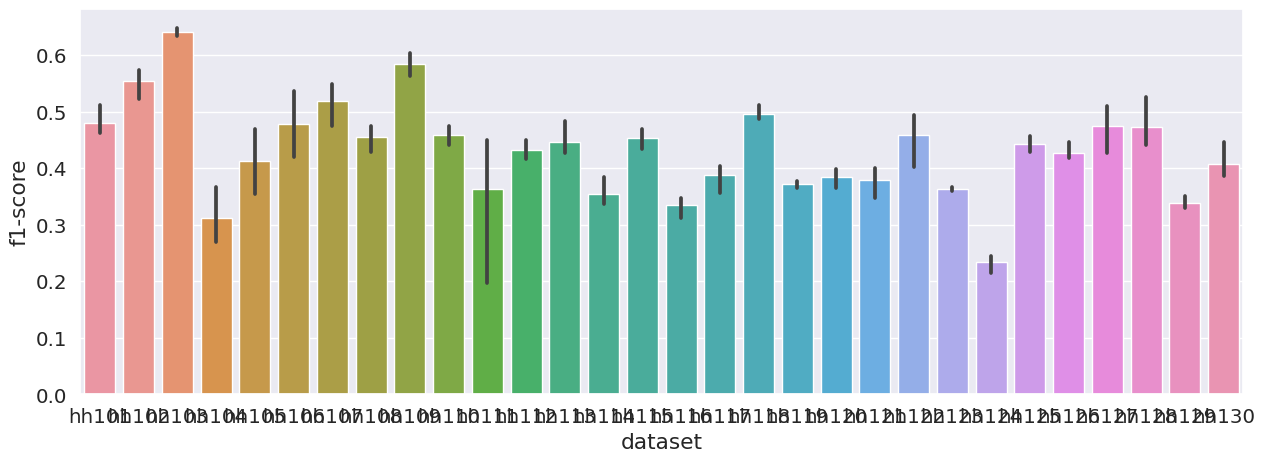

In [40]:
al_data = pd.DataFrame(dataset_f1).sort_values(by=['dataset', 'fold'])
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(data=al_data, x="dataset", y="f1-score")

### Loading FTW results

../ftw_model/result_new1/BiLSTM-(fib_hh117)_1d_cnn_overlook_merged_final_10_32/
../ftw_model/result_new1/BiLSTM-(fib_hh130)_1d_cnn_overlook_merged_final_10_32/


<AxesSubplot:xlabel='dataset', ylabel='f1-score'>

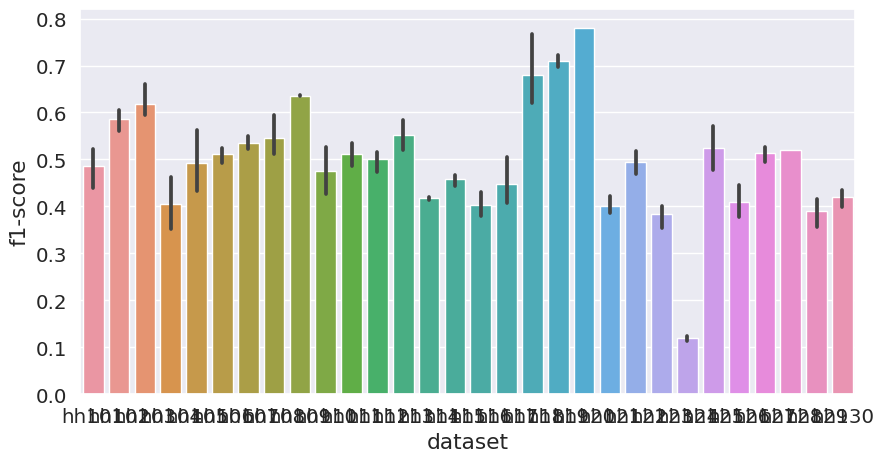

In [45]:
ftw_results_path = '../ftw_model/result_new1/'
ftw_results_dir = [os.path.join(ftw_results_path, f'BiLSTM-(fib_hh1{"0" + str(i) if i < 10 else str(i)})_1d_cnn_overlook_merged_batch_first_10_32/') for i in range(1, 31)]

ftw_dataset_f1 = []
ftw_activities = []
for result_dir in ftw_results_dir:
    # result_dir = result_dir.replace('batch_first', 'final')
    if not os.path.isdir(result_dir):
        result_dir = result_dir.replace('batch_first', 'final')
        if not os.path.isdir(result_dir):
            print(result_dir)
            result_dir = result_dir.replace('merged', 'unmerged')
            if not os.path.isdir(result_dir):
                continue
        # result_dir = result_dir.replace('final', 'with_time2vec').replace('result_new1', 'merged_result')
        # if not os.path.isdir(result_dir):
        #     continue
    for i in range(4):
        results_path = result_dir + '/' + str(i)
        if not os.path.isdir(results_path):
            continue
        if (os.path.exists(results_path + '/report1.txt')):
            results_path = results_path + '/report1.txt'
        elif os.path.exists(results_path + '/report1.tsv'):
            results_path = results_path + '/report1.tsv'
        else:
            continue

        # find the result name in results_path using regex "hh1[0-9][0-9]"
        res = re.search("hh1[0-9][0-9]", result_dir)
        if res:
            dataset_name = res.group(0)
        else:
            dataset_name = 'unknown'

        results = pd.read_csv(results_path, sep='\t', index_col=0)
        if is_macro:
            ftw_dataset_f1.append({'dataset': dataset_name, 'fold': i, 'f1-score': (results['macro/f1'][0]), 'precision': (results['macro/precision'][0]), 'recall': (results['macro/recall'][0])})
        else:
            ftw_dataset_f1.append({'dataset': dataset_name, 'fold': i, 'f1-score': (results['micro/f1'][0]), 'precision': (results['micro/precision'][0]), 'recall': (results['micro/recall'][0])})

        ############################################################
        results_path = result_dir + '/' + str(i)
        if (os.path.exists(results_path + '/report.txt')):
            activity_path = results_path + '/report.txt'
        elif os.path.exists(results_path + '/report.tsv'):
            activity_path = results_path + '/report.tsv'
        else:
            continue

        activities_result = pd.read_csv(activity_path, sep='\t', index_col=0)
        # itetrating over each row and appending the activities
        
        for index, row in activities_result.iterrows():
            if index in ['accuracy', 'macro avg', 'weighted avg']:
                continue
            ftw_activities.append({'dataset': dataset_name, 'fold': i, 'activity': row['activity'], 'f1-score': row["positive\"F1"]})

# take mean of f1-score for each dataset and activity from activities list
ftw_activities = pd.DataFrame(ftw_activities)
ftw_activities = ftw_activities.groupby(['dataset', 'activity']).mean().reset_index()

ftw_data = pd.DataFrame(ftw_dataset_f1).sort_values(by=['dataset', 'fold'])

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=ftw_data, x="dataset", y="f1-score")

<AxesSubplot:xlabel='dataset', ylabel='f1-score'>

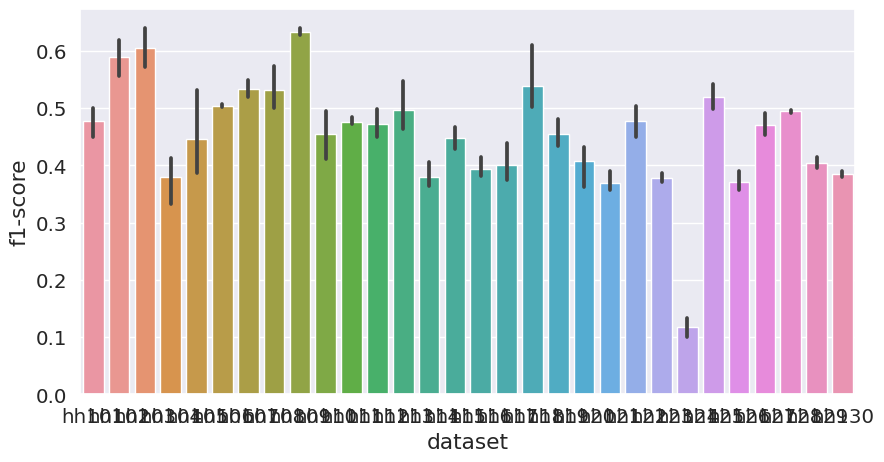

In [46]:
lstm_results_path = '../ftw_model/result_new1/'
lstm_results_dir = [os.path.join(lstm_results_path, f'BiLSTM-(fib_hh1{"0" + str(i) if i < 10 else str(i)})_mean_with_weight_overlook_merged_final_10_32/') for i in range(1, 31)]


lstm_dataset_f1 = []
lstm_activities = []
for result_dir in lstm_results_dir:
    if not os.path.isdir(result_dir):
        print(result_dir)
        result_dir = result_dir.replace('final', 'with_time2vec').replace('result_new1', 'merged_result')
        if not os.path.isdir(result_dir):
            continue
    for i in range(4):
        results_path = result_dir + '/' + str(i)
        if not os.path.isdir(results_path):
            continue
        if (os.path.exists(results_path + '/report1.txt')):
            results_path = results_path + '/report1.txt'
        elif os.path.exists(results_path + '/report1.tsv'):
            results_path = results_path + '/report1.tsv'
        else:
            continue

        # find the result name in results_path using regex "hh1[0-9][0-9]"
        res = re.search("hh1[0-9][0-9]", result_dir)
        if res:
            dataset_name = res.group(0)
        else:
            dataset_name = 'unknown'

        results = pd.read_csv(results_path, sep='\t', index_col=0)
        if is_macro:
            lstm_dataset_f1.append({'dataset': dataset_name, 'fold': i, 'f1-score': (results['macro/f1'][0]), 'precision': (results['macro/precision'][0]), 'recall': (results['macro/recall'][0])})
        else:
            lstm_dataset_f1.append({'dataset': dataset_name, 'fold': i, 'f1-score': (results['micro/f1'][0]), 'precision': (results['micro/precision'][0]), 'recall': (results['micro/recall'][0])})

        ############################################################
        results_path = result_dir + '/' + str(i)
        if (os.path.exists(results_path + '/report.txt')):
            activity_path = results_path + '/report.txt'
        elif os.path.exists(results_path + '/report.tsv'):
            activity_path = results_path + '/report.tsv'
        else:
            continue

        activities_result = pd.read_csv(activity_path, sep='\t', index_col=0)
        # itetrating over each row and appending the activities
        
        for index, row in activities_result.iterrows():
            if index in ['accuracy', 'macro avg', 'weighted avg']:
                continue
            lstm_activities.append({'dataset': dataset_name, 'fold': i, 'activity': row['activity'], 'f1-score': row["positive\"F1"]})

# take mean of f1-score for each dataset and activity from activities list
lstm_activities = pd.DataFrame(lstm_activities)
lstm_activities = lstm_activities.groupby(['dataset', 'activity']).mean().reset_index()

lstm_data = pd.DataFrame(lstm_dataset_f1).sort_values(by=['dataset', 'fold'])

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=lstm_data, x="dataset", y="f1-score")

In [47]:
ftw_activities

,dataset,activity,fold,f1-score
0,hh101,Bathe,2.0,0.866467
1,hh101,Bed_Toilet_Transition,2.0,0.984133
2,hh101,Cook,2.0,0.277800
3,hh101,Cook_Breakfast,2.0,0.786433
4,hh101,Cook_Dinner,2.0,0.519667
...,...,...,...,...
841,hh130,Toilet,2.0,0.462833
842,hh130,Wash_Dishes,2.0,0.000000
843,hh130,Watch_TV,2.0,0.859467
844,hh130,Work,2.0,0.507167


### Read deep-casas result

precision     0.222222
recall        0.100000
f1-score      0.137931
support      20.000000
Name: Step_Out, dtype: float64
precision      0.519231
recall         0.574468
f1-score       0.545455
support      235.000000
Name: Toilet, dtype: float64
precision     0.200000
recall        0.028571
f1-score      0.050000
support      35.000000
Name: Phone, dtype: float64
precision      0.238095
recall         0.074627
f1-score       0.113636
support      134.000000
Name: Personal_Hygiene, dtype: float64
precision     0.958333
recall        0.707692
f1-score      0.814159
support      65.000000
Name: Leave_Home, dtype: float64
precision     0.339286
recall        0.283582
f1-score      0.308943
support      67.000000
Name: Enter_Home, dtype: float64
precision     0.0
recall        0.0
f1-score      0.0
support      37.0
Name: Relax, dtype: float64
precision     0.612903
recall        0.520548
f1-score      0.562963
support      73.000000
Name: Sleep_Out_Of_Bed, dtype: float64
precision     0.

<AxesSubplot:xlabel='dataset', ylabel='f1-score'>

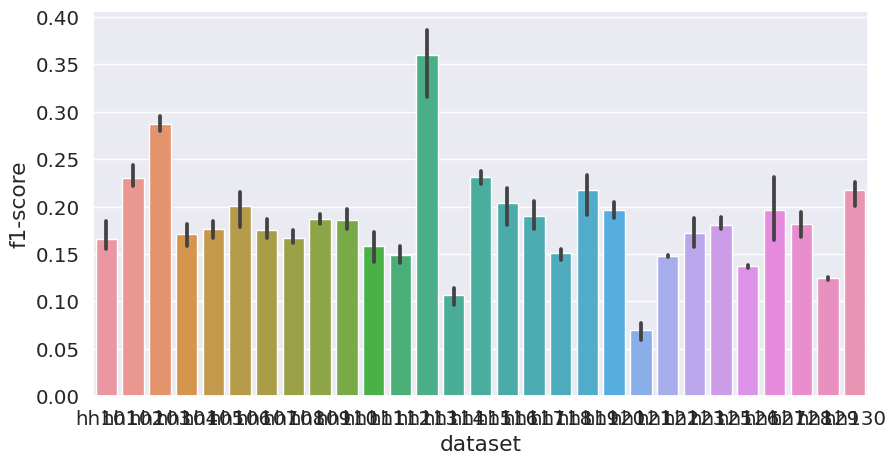

In [48]:
deep_casas_path = '../tmp/checkpoint1/'
deep_casas_link = [os.path.join(deep_casas_path, f'biLSTM-hh1{str(i) if i > 9 else "0" + str(i)}_unmerged') for i in range(1, 31)]

deep_casas_dataset_f1 = []
deep_casas_activities = []
for result_dir in deep_casas_link:
    dataset_name = result_dir.split('/')[-1].split('-')[1].replace('_unmerged', '')
    if not os.path.isdir(result_dir):
        continue
    for i in range(1, 4):
        results_path = result_dir + '/fold' + str(i)
        if not os.path.isdir(results_path):
            continue
        if (os.path.exists(results_path + '/classification_report.csv')):
            results_path = results_path + '/classification_report.csv'
        else:
            continue

        results = pd.read_csv(results_path, index_col=0, header=0)
        if is_macro:
            deep_casas_dataset_f1.append({'dataset': dataset_name, 'fold': i, 'f1-score': (results['f1-score']['macro avg']), 'precision': (results['precision']['macro avg']), 'recall': (results['recall']['macro avg'])})
        else:
            deep_casas_dataset_f1.append({'dataset': dataset_name, 'fold': i, 'f1-score': (results['f1-score']['weighted avg']), 'precision': (results['precision']['weighted avg']), 'recall': (results['recall']['weighted avg'])})
    
        
        for index, row in results.iterrows():
            if index in ['accuracy', 'macro avg', 'weighted avg']:
                continue
            print(row)
            deep_casas_activities.append({'dataset': dataset_name, 'fold': i, 'activity':index, 'f1-score': row['f1-score']})
deep_casas_data = pd.DataFrame(deep_casas_dataset_f1).sort_values(by=['dataset', 'fold'])
deep_casas_activities = pd.DataFrame(deep_casas_activities)

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=deep_casas_data, x="dataset", y="f1-score")

precision     0.6
recall        0.3
f1-score      0.4
support      20.0
Name: Step_Out, dtype: float64
precision      0.5929
recall         0.5038
f1-score       0.5447
support      133.0000
Name: Toilet, dtype: float64
precision     0.1818
recall        0.0800
f1-score      0.1111
support      25.0000
Name: Phone, dtype: float64
precision     0.5397
recall        0.3778
f1-score      0.4444
support      90.0000
Name: Personal_Hygiene, dtype: float64
precision     0.8462
recall        0.5593
f1-score      0.6735
support      59.0000
Name: Leave_Home, dtype: float64
precision     0.8148
recall        0.7857
f1-score      0.8000
support      56.0000
Name: Enter_Home, dtype: float64
precision     0.0392
recall        0.1200
f1-score      0.0591
support      50.0000
Name: Relax, dtype: float64
precision      0.4199
recall         0.2792
f1-score       0.3354
support      573.0000
Name: Sleep_Out_Of_Bed, dtype: float64
precision     0.7500
recall        0.2857
f1-score      0.4138
support  

,dataset,fold,activity,f1-score
0,hh101,1,Step_Out,0.4000
1,hh101,1,Toilet,0.5447
2,hh101,1,Phone,0.1111
3,hh101,1,Personal_Hygiene,0.4444
4,hh101,1,Leave_Home,0.6735
...,...,...,...,...
2929,hh130,3,Read,0.0000
2930,hh130,3,Cook_Breakfast,0.0000
2931,hh130,3,Eat_Breakfast,0.0000
2932,hh130,3,micro avg,0.6921


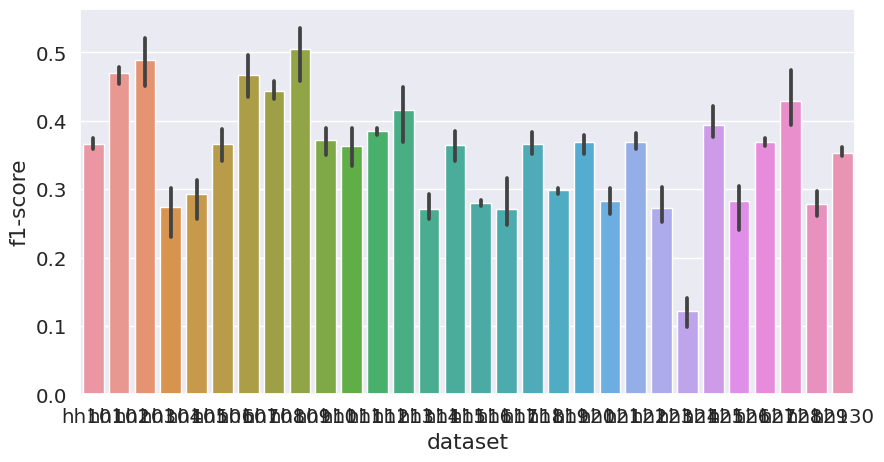

In [49]:
joint_learning_path = '../ftw_model/result_new1'
joint_learning_link = [os.path.join(joint_learning_path, f'BiLSTM-(fib_hh1{"0" + str(i) if i < 10 else str(i)})_joint_overlook_unmerged_10_10') for i in range(1, 31)]

joint_learning_dataset_f1 = []
joint_learning_activities = []
for result_dir in joint_learning_link:
    # find the result name in results_path using regex "hh1[0-9][0-9]"
    if not os.path.isdir(result_dir):
        print(result_dir)
    for i in range(1, 4):
        results_path = result_dir + '/' + str(i)
        if not os.path.isdir(results_path):
            print(results_path)
            continue
        if (os.path.exists(results_path + '/report.txt')):
            results_path = results_path + '/report.txt'
        else:
            continue
        res = re.search("hh1[0-9][0-9]", result_dir)
        if res:
            dataset_name = res.group(0)
        else:
            dataset_name = 'unknown'
            
        results = pd.read_csv(results_path, index_col=0, header=0, sep='\t')
        if is_macro:
            joint_learning_dataset_f1.append({'dataset': dataset_name, 'fold': i, 'f1-score': (results['f1-score']['macro avg']), 'precision': (results['precision']['macro avg']), 'recall': (results['recall']['macro avg'])})
        else:
            joint_learning_dataset_f1.append({'dataset': dataset_name, 'fold': i, 'f1-score': (results['f1-score']['weighted avg']), 'precision': (results['precision']['weighted avg']), 'recall': (results['recall']['weighted avg'])})

        
        for index, row in results.iterrows():
            if index in ['accuracy', 'macro avg', 'weighted avg']:
                continue
            print(row)
            joint_learning_activities.append({'dataset': dataset_name, 'fold': i, 'activity':index, 'f1-score': row['f1-score']})

joint_learning_data = pd.DataFrame(joint_learning_dataset_f1).sort_values(by=['dataset', 'fold'])
joint_learning_activities = pd.DataFrame(joint_learning_activities)

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=joint_learning_data, x="dataset", y="f1-score")
joint_learning_activities

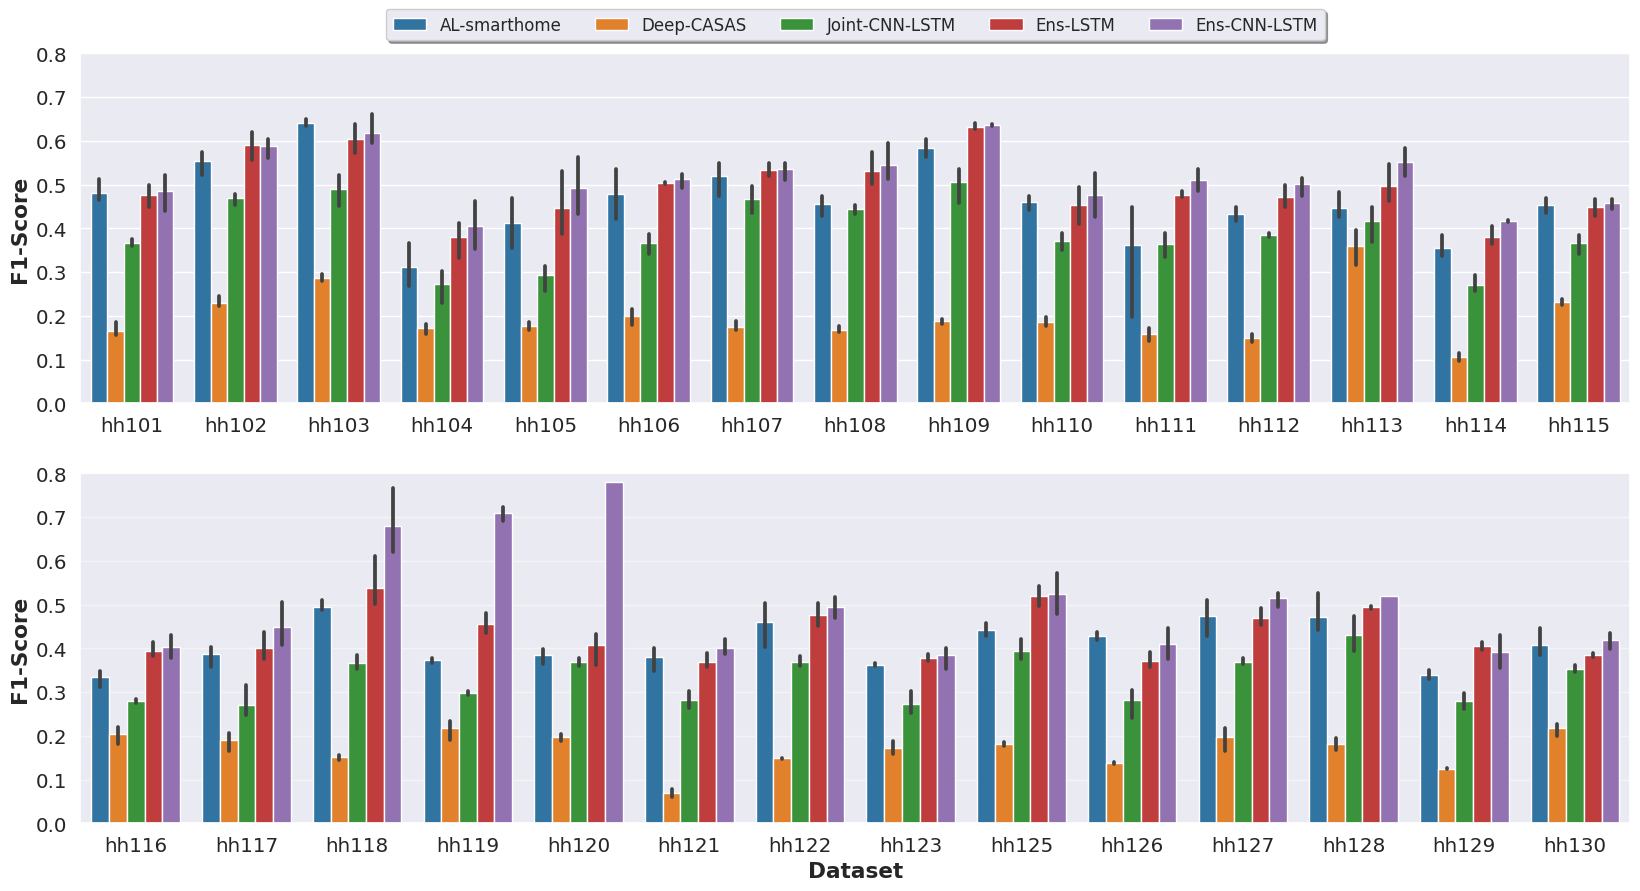

In [50]:
# merge the two dataframes with hue
al_data['model'] = 'AL-smarthome'
lstm_data['model'] = 'Ens-LSTM'
ftw_data['model'] = 'Ens-CNN-LSTM'
deep_casas_data['model'] = 'Deep-CASAS'
joint_learning_data['model'] = 'Joint-CNN-LSTM'

# merged_data = pd.concat([al_data, joint_learning_data, lstm_data, ftw_data], ignore_index=True)
merged_data = pd.concat([al_data, deep_casas_data, joint_learning_data, lstm_data, ftw_data], ignore_index=True)

# filter hh113, hh115, hh117, hh106, hh130
# merged_data = merged_data[~merged_data['dataset'].isin(['hh113', 'hh115', 'hh117', 'hh106', 'hh130'])]

# filter the hh124 dataset
merged_data = merged_data[merged_data['dataset'] != 'hh124']

colors = sns.color_palette('tab10', n_colors=5)

# plot the comparison of the two models near each other
# plot the comparison of the two models near each other
fig, ax = plt.subplots(2, 1, figsize=(20, 10))
sns.barplot(data=merged_data[merged_data['dataset'] < 'hh116'], x="dataset", y="f1-score", hue="model", width=0.8, edgecolor="w", ax=ax[0], palette=colors)
sns.barplot(data=merged_data[merged_data['dataset'] >= 'hh116'], x="dataset", y="f1-score", hue="model", width=0.8, edgecolor="w", ax=ax[1], palette=colors)

ax[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=5, fancybox=True, shadow=True, fontsize=12)
# disable legend for the second plot
ax[1].legend_.remove()

# fix the ylim for ttwo plots
ax[0].set_ylim(0.0, 0.8)
ax[1].set_ylim(0.0, 0.8)
# # make the legend larger font

# disable the xlabel for the first plot
ax[0].set_xlabel('')

# # put legend outside the plot on top right above the plot
# # plt.legend(loc='upper left', bbox_to_anchor=(1, 1.02))

# # rotate the xticks
# plt.xticks(rotation=45, ha='right', rotation_mode='anchor')

# # bold the xlabel and ylabel
plt.xlabel('Dataset', fontweight='bold')
plt.ylabel('F1-Score', fontweight='bold')
ax[0].set_ylabel('F1-Score', fontweight='bold')

# # grid
plt.grid(True, axis='y', alpha=0.5)
ax[1].grid(True, axis='y', alpha=0.5)

# # save the plot
# plt.savefig('evaluation/complex_har.png', dpi=300, bbox_inches='tight')

In [51]:
avg_fold_merged_data = merged_data.groupby(['dataset', 'model']).mean().reset_index()


# sort the data by the f1-score and remove duplicate for each dataset
avg_fold_merged_data = avg_fold_merged_data.sort_values(by=['dataset', 'f1-score'], ascending=False).drop_duplicates(subset=['dataset'], keep='first')

# count the model
model_count = avg_fold_merged_data['model'].value_counts()
model_count

Ens-CNN-LSTM    25
Ens-LSTM         2
AL-smarthome     2
Name: model, dtype: int64

In [40]:
# sort by f1-score
sorted_merged_data = merged_data.sort_values(by=['f1-score'], ascending=False)
# drop duplicate model
sorted_merged_data = sorted_merged_data.drop_duplicates(subset=['model'], keep='first')
max_merged_data = sorted_merged_data.round(4)[['model', 'f1-score', 'dataset']]

# concat the f1-score and the dataset
max_merged_data['f1-score'] = max_merged_data['f1-score'].astype(str) + ' (' + max_merged_data['dataset'] + ')'
max_merged_data = max_merged_data[['model', 'f1-score']].set_index('model')
max_merged_data

,f1-score
model,
AL-smarthome,0.8163 (hh103)
Ens-CNN-LSTM,0.7702 (hh115)
Ens-LSTM,0.7636 (hh113)
Joint-CNN-LSTM,0.7138 (hh113)
Deep-CASAS,0.5674 (hh113)


In [41]:
# sort by f1-score
sorted_merged_data = merged_data.sort_values(by=['f1-score'], ascending=False)
# drop duplicate model
sorted_merged_data = sorted_merged_data.drop_duplicates(subset=['model'], keep='last')
min_merged_data = sorted_merged_data.round(4)[['model', 'f1-score', 'dataset']]

# concat the f1-score and the dataset
min_merged_data['f1-score'] = min_merged_data['f1-score'].astype(str) + ' (' + min_merged_data['dataset'] + ')'
min_merged_data = min_merged_data[['model', 'f1-score']].set_index('model')
min_merged_data

,f1-score
model,
Ens-CNN-LSTM,0.5489 (hh114)
AL-smarthome,0.3663 (hh104)
Joint-CNN-LSTM,0.3379 (hh114)
Ens-LSTM,0.2631 (hh106)
Deep-CASAS,0.1349 (hh114)


In [42]:
# get the average f1-score, precision and recall for each model and their confidence interval
merged_data_out = merged_data.groupby(['model']).agg({'f1-score': ['mean', 'std'], 'precision': ['mean', 'std'], 'recall': ['mean', 'std']})
merged_data_out.columns = ['f1-score', 'f1-score-std', 'precision', 'precision-std', 'recall', 'recall-std']

# calculate the confidence interval
merged_data_out['f1-score-std'] = merged_data_out['f1-score-std'] / np.sqrt(merged_data['dataset'].nunique()) * 1.96
merged_data_out['precision-std'] = merged_data_out['precision-std'] / np.sqrt(merged_data['dataset'].nunique()) * 1.96
merged_data_out['recall-std'] = merged_data_out['recall-std'] / np.sqrt(merged_data['dataset'].nunique()) * 1.96

# output the score with add minus std
merged_data_out['f1-score'] = merged_data_out['f1-score'].round(4).astype(str) + ' $\\pm$ ' + merged_data_out['f1-score-std'].round(3).astype(str)
merged_data_out['precision'] = merged_data_out['precision'].round(4).astype(str) + ' $\\pm$ ' + merged_data_out['precision-std'].round(3).astype(str)
merged_data_out['recall'] = merged_data_out['recall'].round(4).astype(str) + ' $\\pm$' + merged_data_out['recall-std'].round(3).astype(str)

# drop std columns
merged_data_out = merged_data_out.drop(columns=['f1-score-std', 'precision-std', 'recall-std'])

# sort the models
merged_data_out = merged_data_out.reindex(['AL-smarthome', 'Deep-CASAS', 'Joint-CNN-LSTM', 'Ens-LSTM', 'Ens-CNN-LSTM'])

# concat the min and max f1-score as new columns
merged_data_out['Max-F1'] = max_merged_data['f1-score']
merged_data_out['Min-F1'] = min_merged_data['f1-score']

# rename the column as captial first letter
merged_data_out = merged_data_out.rename(columns={'f1-score': 'F1-Score', 'precision': 'Precision', 'recall': 'Recall'})

merged_data_out['F1-Score'] = merged_data_out['F1-Score'].apply(lambda x: '\\textbf{' + x + '}' if x == merged_data_out['F1-Score'].max() else x)
merged_data_out['Precision'] = merged_data_out['Precision'].apply(lambda x: '\\textbf{' + x + '}' if x == merged_data_out['Precision'].max() else x)
merged_data_out['Recall'] = merged_data_out['Recall'].apply(lambda x: '\\textbf{' + x + '}' if x == merged_data_out['Recall'].max() else x)
# drop fold column
# merged_data_out = merged_data_out.drop(columns=['fold'])
# bold the column name
merged_data_out.columns = ['\\textbf{' + col + '}' for col in merged_data_out.columns]

print(merged_data_out.to_latex(escape=False))
# merged_data_out

\begin{tabular}{llllll}
\toprule
{} &           \textbf{F1-Score} &           \textbf{Precision} &            \textbf{Recall} & \textbf{Max-F1} & \textbf{Min-F1} \\
model          &                             &                              &                            &                 &                 \\
\midrule
AL-smarthome   &          0.6176 $\pm$ 0.036 &           0.6585 $\pm$ 0.031 &          0.6239 $\pm$0.034 &  0.8163 (hh103) &  0.3663 (hh104) \\
Deep-CASAS     &          0.3092 $\pm$ 0.029 &           0.3379 $\pm$ 0.029 &          0.3528 $\pm$0.027 &  0.5674 (hh113) &  0.1349 (hh114) \\
Joint-CNN-LSTM &          0.5207 $\pm$ 0.032 &           0.6442 $\pm$ 0.029 &          0.4704 $\pm$0.034 &  0.7138 (hh113) &  0.3379 (hh114) \\
Ens-LSTM       &          0.6396 $\pm$ 0.027 &            0.6543 $\pm$ 0.03 &          0.6306 $\pm$0.025 &  0.7636 (hh113) &  0.2631 (hh106) \\
Ens-CNN-LSTM   &  \textbf{0.6593 $\pm$ 0.02} &  \textbf{0.6811 $\pm$ 0.021} &  \textbf{0.641 $\pm$0.024} &

In [83]:
merged_data
# group by dataset and model and get the mean of the f1-score
merged_data_latex = merged_data.groupby(['dataset', 'model']).mean().drop(columns=['fold'])

# arranage the order of the models
merged_data_latex = merged_data_latex.reindex(['AL-smarthome', 'Deep-CASAS', 'Joint-CNN-LSTM', 'Ens-LSTM', 'Ens-CNN-LSTM'], level=1)

# round the f1-score to 4 decimal places
merged_data_latex = merged_data_latex.round(6)

# rename the columns to capitalize the first letter for f1-score to F1-score, precision to Precision and recall to Recall
merged_data_latex = merged_data_latex.rename(columns={'f1-score': 'F1-score', 'precision': 'Precision', 'recall': 'Recall'})

# bold the column names by adding \textbf{column_name}
merged_data_latex.columns = ['\textbf{' + col + '}' for col in merged_data_latex.columns]

# make the dataset and model as columns but still grouped by dataset

# split the table into 5 parts
for i in range(0, 5):
    # get the current part
    current_part = merged_data_latex.iloc[i*30:(i+1)*30]
    # print the latex table
    print(current_part.to_latex(multirow=True, escape=False))
    # print a new line
    
# to latex with multiindex
# print(merged_data_latex.to_latex(multirow=True))

\begin{tabular}{llrrr}
\toprule
      &              &  \textbf{F1-score} &  \textbf{Precision} &  \textbf{Recall} \\
dataset & model &                    &                     &                  \\
\midrule
\multirow{5}{*}{hh101} & AL-smarthome &           0.480152 &            0.474619 &         0.528981 \\
      & Deep-CASAS &           0.165640 &            0.224949 &         0.167493 \\
      & Joint-CNN-LSTM &           0.365867 &            0.442867 &         0.337700 \\
      & Ens-LSTM &           0.477124 &            0.525254 &         0.471218 \\
      & Ens-CNN-LSTM &           0.486153 &            0.535142 &         0.473481 \\
\cline{1-5}
\multirow{5}{*}{hh102} & AL-smarthome &           0.553439 &            0.548490 &         0.605349 \\
      & Deep-CASAS &           0.229819 &            0.305640 &         0.215961 \\
      & Joint-CNN-LSTM &           0.469667 &            0.557333 &         0.437567 \\
      & Ens-LSTM &           0.589722 &            0.650631 & 

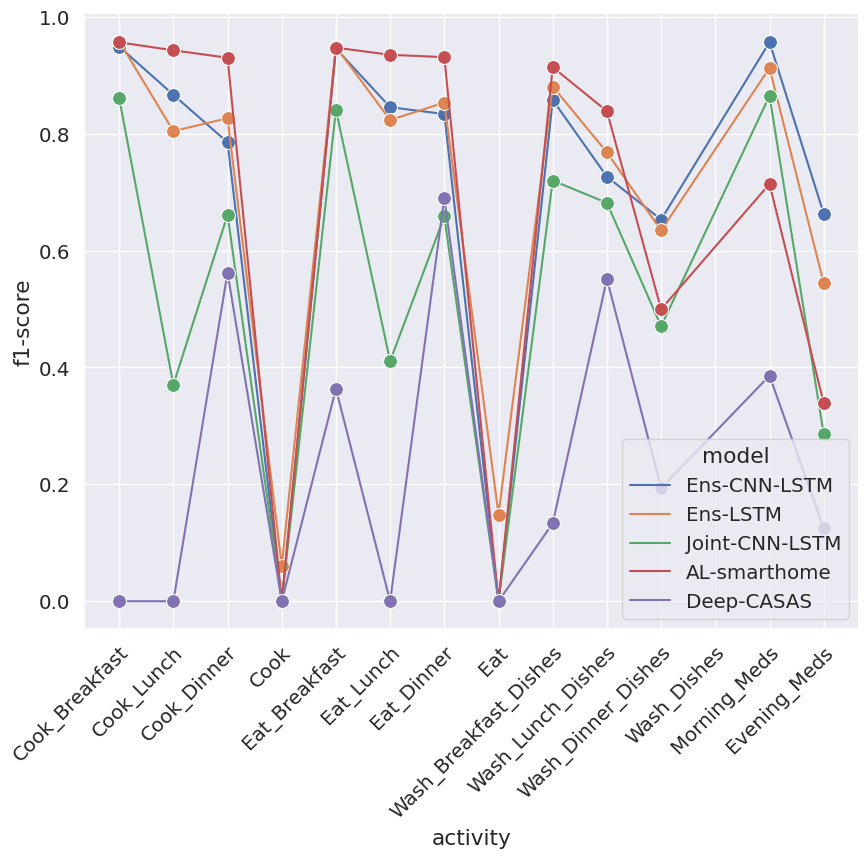

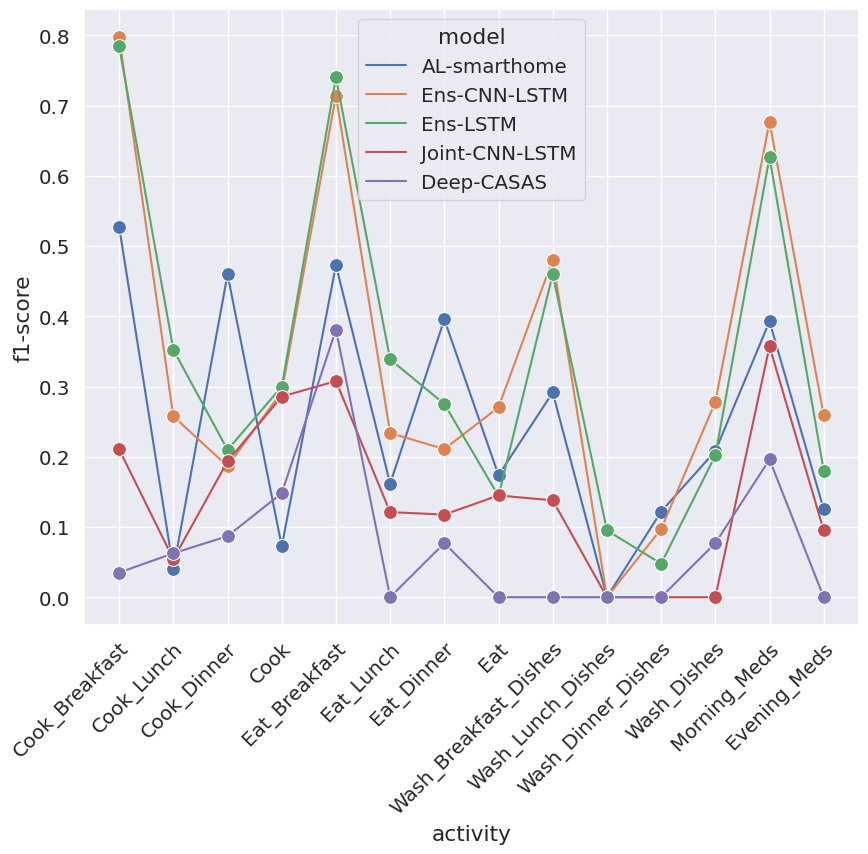

In [84]:
# combine the two activities dataframes
al_activities['model'] = 'AL-smarthome'
lstm_activities['model'] = 'Ens-LSTM'
ftw_activities['model'] = 'Ens-CNN-LSTM'
deep_casas_activities['model'] = 'Deep-CASAS'
joint_learning_activities['model'] = 'Joint-CNN-LSTM'

merged_activities = pd.concat([al_activities, deep_casas_activities, joint_learning_activities, lstm_activities, ftw_activities], ignore_index=True)

# drop micro avg and macro avg
merged_activities = merged_activities[merged_activities['activity'] != 'micro avg']
merged_activities = merged_activities[merged_activities['activity'] != 'macro avg']

# plot heatmap for each dataset
for dataset in merged_activities['dataset'].unique():
    if dataset not in ['hh103', 'hh104']:
        continue

    # get the delta of the two models
    dataset_activities = merged_activities[merged_activities['dataset'] == dataset]

    # remove duplicate indices
    dataset_activities = dataset_activities.drop_duplicates(subset=['activity', 'model'], keep='first')
    
    dataset_activities = dataset_activities.pivot(index='activity', columns='model', values='f1-score')
    # fill the nan values with 0
    dataset_activities = dataset_activities.fillna(0)
    
    # drop the activities that all models have 0 f1-score
    dataset_activities = dataset_activities[(dataset_activities.T != 0).any()]
    
    dataset_activities['delta'] = dataset_activities['Ens-CNN-LSTM'] - dataset_activities['Joint-CNN-LSTM']
    dataset_activities = dataset_activities.sort_values(by='delta', ascending=False)

    # add a plus sign to the delta
    # dataset_activities['delta'] = dataset_activities['delta'].apply(lambda x: '+' + str(x))

    # put human picked features on the left
    dataset_activities = dataset_activities[['AL-smarthome', 'Deep-CASAS', 'Joint-CNN-LSTM', 'Ens-LSTM', 'Ens-CNN-LSTM']]

    # multply the values by 100
    # dataset_activities = dataset_activities * 100

    # print(dataset_activities.round(2).to_latex())
    # increase the font size
    # sns.set(font_scale=1.3)

    # plt.figure(figsize=(10, 10))
    # sns.heatmap(dataset_activities, annot=True, fmt='.3f', cmap='Blues')
    # # retote yticks
    # plt.xlabel('Model', fontweight='bold')
    # plt.ylabel('Activity', fontweight='bold')
    # plt.yticks(rotation=0)
    # # plt.xticks(rotation=45, ha='right', rotation_mode='anchor')

    # plt.title(dataset + ' F1-score Activities')
    # plt.show()

    sns.set(font_scale=1.3)

    plt.figure(figsize=(10, 8))
    # sns.heatmap(dataset_activities, annot=True, fmt='.2f', cmap='Blues')
    # # retote yticks
    # plt.xlabel('Model', fontweight='bold')
    # plt.ylabel('Activity', fontweight='bold')

    # plt.yticks(rotation=0)
    # plt.title(dataset + ' Best F1-score Activities')
    # # save the plot
    # plt.savefig('evaluation/' + dataset + '_complex_best.png', dpi=300, bbox_inches='tight')
    # plt.show()


    # plot lineplot for each model as a line for each activity
    # only focus on activities that contain Breakfast, Lunch, Dinner, Morning, Evening, Eat, Drink, Wash, Cook
    dataset_activities = dataset_activities[dataset_activities.index.str.contains('Breakfast|Lunch|Dinner|Morning|Evening|Eat|Drink|Wash|Cook')]
    dataset_activities = dataset_activities.reset_index()
    dataset_activities = dataset_activities.melt(id_vars=['activity'], var_name='model', value_name='f1-score')
    # dataset_activities = dataset_activities.sort_values(by='f1-score', ascending=False)
    # sort the activities by ['Cook_Breakfast', 'Cook_Lunch', 'Cook_Dinner', 'Cook', 'Eat_Breakfast', 'Eat_Lunch', 'Eat_Dinner', 'Eat', 'Wash_Breakfast_Dishes', 'Wash_Lunch_Dishes', 'Wash_Dinner_Dishes', 'Wash_Dishes', 'Morning_Meds', 'Evening_Meds']
    dataset_activities['activity'] = pd.Categorical(dataset_activities['activity'], ['Cook_Breakfast', 'Cook_Lunch', 'Cook_Dinner', 'Cook', 'Eat_Breakfast', 'Eat_Lunch', 'Eat_Dinner', 'Eat', 'Wash_Breakfast_Dishes', 'Wash_Lunch_Dishes', 'Wash_Dinner_Dishes', 'Wash_Dishes', 'Morning_Meds', 'Evening_Meds'])
    dataset_activities = dataset_activities.sort_values(by='activity')
    
    # plot the lineplot with markers 'o'
    sns.lineplot(x='activity', y='f1-score', hue='model', data=dataset_activities, marker='o', markersize=10, dashes=False)

    # rotate the xticks
    plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
    
# dataset_activities

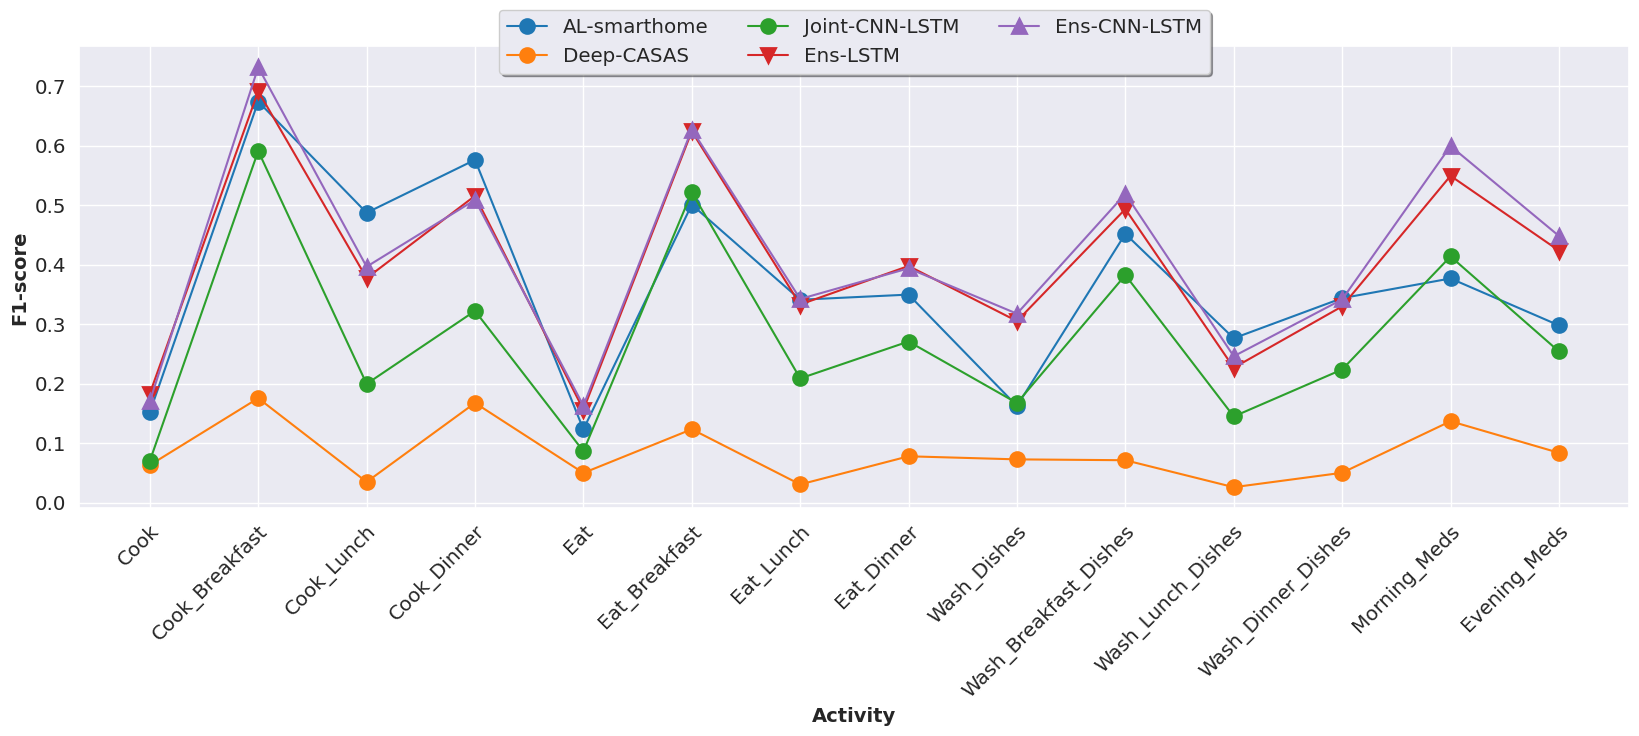

In [120]:
# combine the two activities dataframes
al_activities['model'] = 'AL-smarthome'
lstm_activities['model'] = 'Ens-LSTM'
ftw_activities['model'] = 'Ens-CNN-LSTM'
deep_casas_activities['model'] = 'Deep-CASAS'
joint_learning_activities['model'] = 'Joint-CNN-LSTM'

merged_activities = pd.concat([al_activities, deep_casas_activities, joint_learning_activities, lstm_activities, ftw_activities], ignore_index=True)

# drop micro avg and macro avg
merged_activities = merged_activities[merged_activities['activity'] != 'micro avg']
merged_activities = merged_activities[merged_activities['activity'] != 'macro avg']

# only focus on activities that contain Breakfast, Lunch, Dinner, Morning, Evening, Eat, Drink, Wash, Cook
merged_activities = merged_activities[merged_activities['activity'].str.contains('Breakfast|Lunch|Dinner|Morning|Evening|Eat|Drink|Wash|Cook').fillna(False)]
# take the mean of the f1-score for each activity
merged_activities = merged_activities.groupby(['activity', 'model']).mean()

merged_activities = merged_activities.reset_index()

# keep only the activity, model and f1-score columns
merged_activities = merged_activities[['activity', 'model', 'f1-score']]

# sort the model with activities by ['AL-smarthome', 'Deep-CASAS', 'Joint-CNN-LSTM', 'Ens-LSTM', 'Ens-CNN-LSTM']
merged_activities['model'] = pd.Categorical(merged_activities['model'], ['AL-smarthome', 'Deep-CASAS', 'Joint-CNN-LSTM', 'Ens-LSTM', 'Ens-CNN-LSTM'])
merged_activities = merged_activities.sort_values(by=['activity', 'model'])
# # merged_activities = merged_activities.sort_values(by='f1-score', ascending=False)
# # sort the activities by ['Cook_Breakfast', 'Cook_Lunch', 'Cook_Dinner', 'Cook', 'Eat_Breakfast', 'Eat_Lunch', 'Eat_Dinner', 'Eat', 'Wash_Breakfast_Dishes', 'Wash_Lunch_Dishes', 'Wash_Dinner_Dishes', 'Wash_Dishes', 'Morning_Meds', 'Evening_Meds']
merged_activities['activity'] = pd.Categorical(merged_activities['activity'], ['Cook', 'Cook_Breakfast', 'Cook_Lunch', 'Cook_Dinner', 'Eat', 'Eat_Breakfast', 'Eat_Lunch', 'Eat_Dinner', 'Wash_Dishes', 'Wash_Breakfast_Dishes', 'Wash_Lunch_Dishes', 'Wash_Dinner_Dishes', 'Morning_Meds', 'Evening_Meds'])
merged_activities = merged_activities.sort_values(by='activity')

markers = ['o', 'o', 'o', 'v', '^']
# get a list of colors for the markers
colors = sns.color_palette('tab10', n_colors=5)

fig, ax = plt.subplots(figsize=(20, 6))
# plot the lineplot with markers for each model
for i, model in enumerate(merged_activities['model'].unique()):
    if i < 3:
        sns.lineplot(x='activity', y='f1-score', data=merged_activities[merged_activities['model'] == model], marker=markers[i], markersize=10, dashes=False, label=model, markeredgecolor=colors[i], markeredgewidth=2, color=colors[i])
    else:
    # without facecolor
        sns.lineplot(x='activity', y='f1-score', data=merged_activities[merged_activities['model'] == model], marker=markers[i], markersize=10, dashes=False, label=model, markeredgecolor=colors[i], markeredgewidth=2, color=colors[i])
# sns.lineplot(x='activity', y='f1-score', hue='model', data=merged_activities, marker='o', markersize=10, dashes=False)
# rotate the xticks
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')

# merged_activities
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.10),
          ncol=3, fancybox=True, shadow=True)

# set the xlabel and ylabel
plt.xlabel('Activity', fontweight='bold', fontsize=14)
plt.ylabel('F1-score', fontweight='bold', fontsize=14)

plt.savefig('evaluation/complex_time_act.png', dpi=300, bbox_inches='tight')

In [86]:
# combine the two activities dataframes
al_activities['model'] = 'AL-smarthome'
lstm_activities['model'] = 'Ens-LSTM'
ftw_activities['model'] = 'Ens-CNN-LSTM'
deep_casas_activities['model'] = 'Deep-CASAS'
joint_learning_activities['model'] = 'Joint-CNN-LSTM'

merged_activities = pd.concat([al_activities, deep_casas_activities, joint_learning_activities, lstm_activities, ftw_activities], ignore_index=True)
merged_activities = merged_activities[merged_activities['activity'] != 'micro avg']
merged_activities = merged_activities[merged_activities['activity'] != 'macro avg']

# plot heatmap for each dataset
for dataset in merged_activities['dataset'].unique():
    if dataset not in ['hh104', 'hh104']:
        continue

    # get the delta of the two models
    dataset_activities = merged_activities[merged_activities['dataset'] == dataset]

    # remove duplicate indices
    dataset_activities = dataset_activities.drop_duplicates(subset=['activity', 'model'], keep='first')
    
    dataset_activities = dataset_activities.pivot(index='activity', columns='model', values='f1-score')
    # fill the nan values with 0
    dataset_activities = dataset_activities.fillna(0)
    
    # filter those activities that are 0 for all models
    # dataset_activities = dataset_activities[dataset_activities['AL-smarthome'] != 0]
    
    dataset_activities['delta'] = dataset_activities['Ens-CNN-LSTM'] - dataset_activities['Joint-CNN-LSTM']
    dataset_activities = dataset_activities.sort_values(by='delta', ascending=False)

    # add a plus sign to the delta
    # dataset_activities['delta'] = dataset_activities['delta'].apply(lambda x: '+' + str(x))

    # put human picked features on the left
    dataset_activities = dataset_activities[['Deep-CASAS', 'Joint-CNN-LSTM', 'Ens-LSTM', 'Ens-CNN-LSTM']]

    # # increase the font size
    # sns.set(font_scale=1.3)

    # plt.figure(figsize=(10, 10))
    # sns.heatmap(dataset_activities[-7:], annot=True, fmt='.2f', cmap='Blues')
    # # retote yticks
    # plt.xlabel('Model', fontweight='bold')
    # plt.ylabel('Activity', fontweight='bold')

    # plt.yticks(rotation=0)
    # plt.title(dataset + ' Worst F1-score Activities')
    # plt.savefig('evaluation/' + dataset + '_complex_worst.png', dpi=300, bbox_inches='tight')

    # plt.show()
dataset_activities

model,Deep-CASAS,Joint-CNN-LSTM,Ens-LSTM,Ens-CNN-LSTM
activity,,,,
Cook_Breakfast,0.035088,0.2105,0.784533,0.797367
Relax,0.177778,0.0000,0.500133,0.482300
Dress,0.246154,0.0000,0.204533,0.447767
Eat_Breakfast,0.380952,0.3077,0.740133,0.714333
Wash_Breakfast_Dishes,0.000000,0.1379,0.459767,0.480800
Entertain_Guests,0.000000,0.0000,0.408833,0.321867
Morning_Meds,0.196078,0.3571,0.626400,0.677067
Phone,0.125000,0.0000,0.166667,0.311867
Wash_Dishes,0.076923,0.0000,0.201833,0.277867


model                  Human picked features       FTW      LSTM  Deep-CASAS
activity                                                                    
Morning_Meds                        0.714097  0.956767  0.912633    0.385965
Cook_Breakfast                      0.956545  0.949233  0.958467    0.000000
Eat_Breakfast                       0.947412  0.945833  0.949067    0.363636
Bed_Toilet_Transition               0.925630  0.920733  0.879900    0.150943
Leave_Home                          0.878836  0.915667  0.820400    0.674699
Cook_Lunch                          0.942878  0.866800  0.804600    0.000000
Sleep                               0.972356  0.860133  0.846067    0.563830
Wash_Breakfast_Dishes               0.914004  0.857933  0.880933    0.133333
Eat_Lunch                           0.935185  0.845533  0.823567    0.000000
Enter_Home                          0.932338  0.844367  0.790800    0.921739
Eat_Dinner                          0.931174  0.833733  0.853367    0.690476

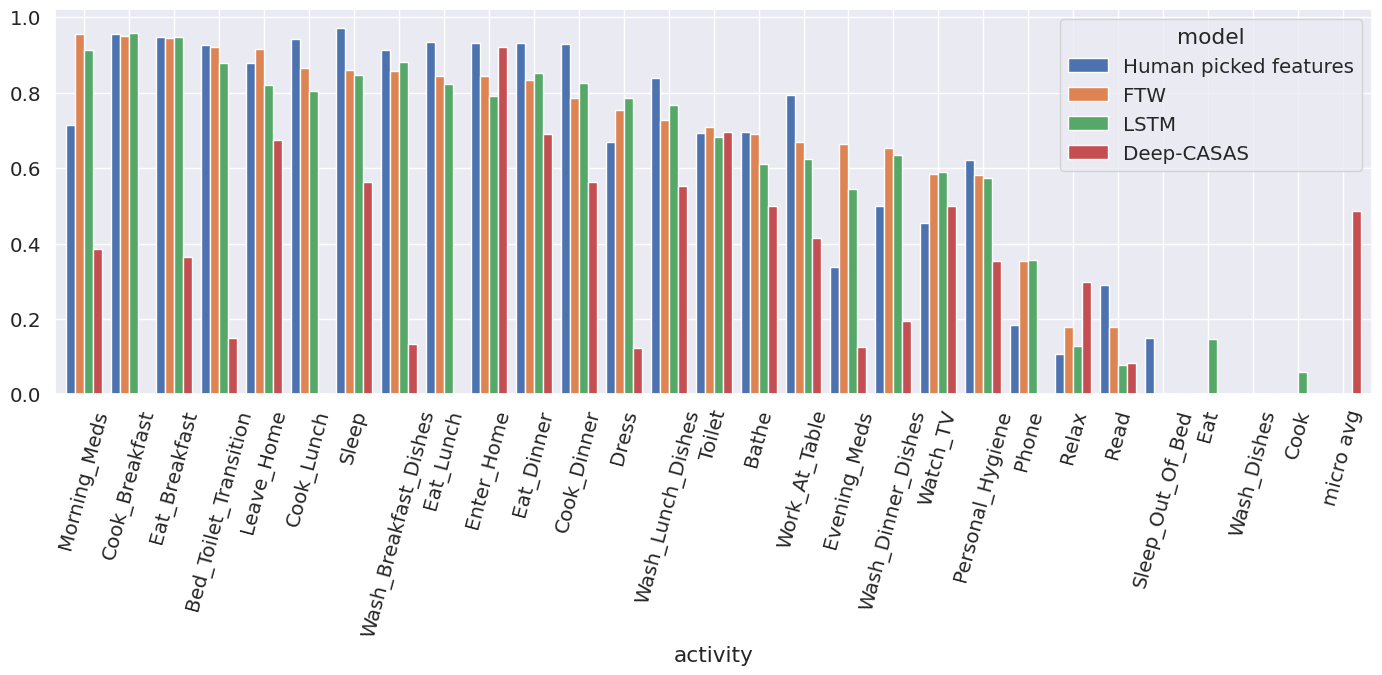

In [87]:
# combine the two activities dataframes
al_activities['model'] = 'Human picked features'
ftw_activities['model'] = 'FTW'
lstm_activities['model'] = 'LSTM'
deep_casas_activities['model'] = 'Deep-CASAS'

merged_activities = pd.concat([al_activities, lstm_activities, ftw_activities, deep_casas_activities], ignore_index=True)

# plot heatmap for each dataset
for dataset in merged_activities['dataset'].unique():
    if dataset not in ['hh103']:
        continue

    # get the delta of the two models
    dataset_activities = merged_activities[merged_activities['dataset'] == dataset]

    # remove duplicate indices
    dataset_activities = dataset_activities.drop_duplicates(subset=['activity', 'model'], keep='first')
    
    dataset_activities = dataset_activities.pivot(index='activity', columns='model', values='f1-score')
    # fill the nan values with 0
    dataset_activities = dataset_activities.fillna(0)
    
    # dataset_activities['delta'] = dataset_activities['FTW'] - dataset_activities['Human picked features']
    dataset_activities = dataset_activities.sort_values(by='FTW', ascending=False)

    # add a plus sign to the delta
    # dataset_activities['delta'] = dataset_activities['delta'].apply(lambda x: '+' + str(x))

    # put human picked features on the left
    dataset_activities = dataset_activities[['Human picked features', 'FTW', 'LSTM', 'Deep-CASAS']]

    print(dataset_activities)

    # rotate the xticks    
    # plot the barplot for each model
    fig, ax = plt.subplots(figsize=(17, 5))
    dataset_activities.plot.bar(ax=ax, width=0.8, edgecolor="w")
    plt.xticks(rotation=75)


### Read activities

In [88]:
## Load the hh_npy dataset
import json

i1 = '15'
features_path = f'../hh_dataset/hh_npy/fib_hh1{i1}_feature.npy'
activities_path = f'../hh_dataset/hh_npy/fib_hh1{i1}_activity.npy'

features = np.load(features_path)
activities = np.load(activities_path)

mapping_file = activities_path.rsplit('_', 1)[0] + '_mapping.json'
with open(mapping_file, 'r') as f:
    mapping = json.load(f)



In [89]:
activity_occurence = {}
for i in range(1, 31):
    i1 = str(i) if i > 9 else '0' + str(i)
    activities_path = f'../hh_dataset/hh_npy/fib_hh1{i1}_activity.npy'

    activities = np.load(activities_path)

    mapping_file = activities_path.rsplit('_', 1)[0] + '_mapping.json'
    with open(mapping_file, 'r') as f:
        mapping = json.load(f)
    count = np.count_nonzero(activities == 1, axis=0)
    assert len(count) == len(mapping), f'{len(count)} != {len(mapping)}'
    
    activity_occurence[i1] = {act: c for act, c in zip(mapping, count)}
    

AssertionError: 11 != 12

In [90]:
occur_dfs = pd.DataFrame(activity_occurence)
# sort the rows 
occur_dfs = occur_dfs.reindex(occur_dfs.sum(axis=1).sort_values(ascending=False).index)

# rename the columns by adding hh1
occur_dfs.columns = ['hh1' + col for col in occur_dfs.columns]

# partition the occur_df by 6 column each
for i in range(5):
    occur_df = occur_dfs.iloc[:, i*6:(i+1)*6]

    # filter nan if all values are nan
    occur_df = occur_df.dropna(how='all')

    # insert an new row before Other_Activity which show the percentage of Other_Activity among all activities
    occur_df.loc['% Other'] = occur_df.loc['Other_Activity'] / occur_df.sum(axis=0) * 100
    # put the % Other row before Other_Activity and all other rows
    occur_df = occur_df.reindex(['% Other', 'Other_Activity'] + list(occur_df.index[1:-1]))

    occur_df.loc['% Other'] = occur_df.loc['% Other'].apply(lambda x: str.format('{:.1f}', x) + '%')

    # drop decimal places but not for nan
    occur_df = occur_df.applymap(lambda x: str.format('{:.0f}', x) if not (isinstance(x, str) or np.isnan(x)) else x)

    # replace nan with '-'
    occur_df = occur_df.fillna('-')
    styler = occur_df.style
    # only bold the columns

    # add index name as Activity to occur_df
    occur_df.index.name = 'Activity'

    # modify the column name by adding \textbf{}
    occur_df.columns = [f'\\textbf{{{i}}}' for i in occur_df.columns]

    # print(styler.applymap(lambda v: "font-weight: bold;", subset=pd.IndexSlice[:, occur_df.columns[0]]).to_latex(convert_css=True))

    # to latex
    print(occur_df.to_latex())

KeyError: 'Other_Activity'

In [25]:
# print the first 6 columns in latex

printing_result = occur_df.iloc[:, :6]
# drop row if all column equals '-'


print(occur_df.iloc[:, :6].dropna(how='all').to_latex())

\begin{tabular}{lllllll}
\toprule
{} & \textbackslash textbf\{hh101\} & \textbackslash textbf\{hh102\} & \textbackslash textbf\{hh103\} & \textbackslash textbf\{hh104\} & \textbackslash textbf\{hh105\} & \textbackslash textbf\{hh106\} \\
Activity              &                &                &                &                &                &                \\
\midrule
\% Other               &          22.2\% &          32.5\% &          39.3\% &          42.0\% &          47.6\% &          39.5\% \\
Other\_Activity        &           2453 &           3643 &           3739 &           5229 &           3569 &           3580 \\
Sleep                 &           1249 &           1751 &           1501 &           2163 &            727 &            930 \\
Watch\_TV              &           2439 &            716 &            775 &              - &            287 &            360 \\
Personal\_Hygiene      &            253 &            618 &            322 &            326 &            161 &

In [114]:
styler = occur_df.style
# apply map only to the columns
styler.applymap(lambda v: "color: red;", subset=pd.IndexSlice[:, ['hh1' + i for i in ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30']]])

,hh107,hh108,hh109,hh110,hh111,hh112
Other_Activity,3283,4119,4928,1517,4259,7810
Sleep,893,1513,1411,1057,1292,3473
Watch_TV,790,356,425,308,422,819
Personal_Hygiene,290,788,499,110,260,944
Work_On_Computer,248,275,-,147,1418,1547
Toilet,438,611,469,129,313,534
Dress,181,361,385,156,260,681
Leave_Home,202,288,426,75,177,297
Enter_Home,194,275,410,74,175,288
Sleep_Out_Of_Bed,68,43,386,14,-,556


In [61]:
avg_fold_merged_data = merged_data.groupby(['dataset', 'model']).mean().reset_index()

# compare the difference of F1-score between AL-smarthome and the Ens-CNN-LSTM on hh103 and hh126
avg_fold_merged_data[(avg_fold_merged_data['dataset'] == 'hh103') | (avg_fold_merged_data['dataset'] == 'hh126')]

,dataset,model,fold,f1-score,precision,recall
10,hh103,AL-smarthome,1.0,0.641427,0.644482,0.660617
11,hh103,Deep-CASAS,2.0,0.286754,0.355741,0.312039
12,hh103,Ens-CNN-LSTM,2.0,0.618733,0.649156,0.609219
13,hh103,Ens-LSTM,2.0,0.604862,0.633380,0.591156
14,hh103,Joint-CNN-LSTM,2.0,0.489133,0.587700,0.442133
120,hh126,AL-smarthome,1.0,0.427528,0.423272,0.477591
121,hh126,Deep-CASAS,2.0,0.137257,0.165743,0.150666
122,hh126,Ens-CNN-LSTM,2.0,0.409461,0.481851,0.391258
123,hh126,Ens-LSTM,2.0,0.370559,0.416504,0.365571
124,hh126,Joint-CNN-LSTM,2.0,0.282200,0.387633,0.256133


In [85]:
# combine the two activities dataframes
al_activities['model'] = 'AL-smarthome'
lstm_activities['model'] = 'Ens-LSTM'
ftw_activities['model'] = 'Ens-CNN-LSTM'
deep_casas_activities['model'] = 'Deep-CASAS'
joint_learning_activities['model'] = 'Joint-CNN-LSTM'

merged_activities = pd.concat([al_activities, deep_casas_activities, joint_learning_activities, lstm_activities, ftw_activities], ignore_index=True)

# drop micro avg and macro avg
merged_activities = merged_activities[merged_activities['activity'] != 'micro avg']
merged_activities = merged_activities[merged_activities['activity'] != 'macro avg']

# filter the hh103 and hh126
merged_activities = merged_activities[(merged_activities['dataset'] == 'hh103')]

# the average of the F1-score of each activity
avg_merged_activities = merged_activities.groupby(['dataset', 'model', 'activity']).mean().reset_index()

# calculate the difference of F1-score between AL-smarthome and the Ens-CNN-LSTM
delta = avg_merged_activities[avg_merged_activities['model'] == 'AL-smarthome']['f1-score'] - avg_merged_activities[avg_merged_activities['model'] == 'Ens-CNN-LSTM']['f1-score']

# # sort the diff in descending order
# avg_merged_activities = avg_merged_activities.sort_values(by='diff', ascending=False)
# avg_merged_activities
al_smarthome_data = avg_merged_activities[avg_merged_activities['model'] == 'AL-smarthome'][['activity', 'f1-score']].reset_index(drop=True)
ens_cnn_lstm_data = avg_merged_activities[avg_merged_activities['model'] == 'Ens-CNN-LSTM'][['activity', 'f1-score']].reset_index(drop=True)

# merged the two dataframes
merged_data = pd.merge(al_smarthome_data, ens_cnn_lstm_data, on='activity', suffixes=['_al_smarthome', '_ens_cnn_lstm'])

# measure the difference of F1-score between AL-smarthome and the Ens-CNN-LSTM
merged_data['diff'] = merged_data['f1-score_ens_cnn_lstm'] - merged_data['f1-score_al_smarthome']
# sort the diff in descending order
merged_data = merged_data.sort_values(by='diff', ascending=False)
merged_data

,activity,f1-score_al_smarthome,f1-score_ens_cnn_lstm,diff
11,Evening_Meds,0.339161,0.663367,0.324206
13,Morning_Meds,0.714097,0.956767,0.242669
15,Phone,0.184143,0.355067,0.170923
22,Wash_Dinner_Dishes,0.499806,0.653067,0.153261
25,Watch_TV,0.454351,0.584233,0.129883
6,Dress,0.668474,0.753533,0.085059
17,Relax,0.106209,0.178700,0.072491
12,Leave_Home,0.878836,0.915667,0.036831
20,Toilet,0.693980,0.710033,0.016054
2,Cook,0.000000,0.000000,0.000000
